# Importaciones Necesarias

In [ ]:
# Importamos todo lo necesario

from google.colab import drive
from zipfile import ZipFile
import os
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.metrics import accuracy
import time
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis as PCA
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from numpy.linalg import eigh
import warnings
warnings.filterwarnings("ignore")


#Cargar el dataset generado en el notebook  **01 - exploración y preprocesado de datos**

In [ ]:
# Monta Google Drive
drive.mount('/content/drive')


In [ ]:
# Ruta del archivo en Google Drive
ruta_dataset = '/content/drive/MyDrive/cumulative_preprocesado.csv'
if not os.path.exists(ruta_dataset):
    print("El archivo CSV no está disponible. Asegúrate de ejecutar el notebook 01 - exploración y preprocesado de datos para generar el cumulative_preprocesado.csv")
else:
    df = pd.read_csv(ruta_dataset)

In [ ]:
df

,ExoplanetArchiveDisposition,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,...,StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag,TCEDeliver_q1_q16_tce,TCEDeliver_q1_q17_dr24_tce,TCEDeliver_q1_q17_dr25_tce
0,1,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.538750,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,0,1
1,1,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.513840,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,0,1
2,1,1.000,0,0,0,0,2.525592,0.000004,-0.000004,171.595550,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,0,1
3,1,1.000,0,0,0,0,11.094321,0.000020,-0.000020,171.201160,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,0,1
4,1,1.000,0,0,0,0,4.134435,0.000010,-0.000010,172.979370,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,0,0.532,0,0,0,0,4.736816,0.000147,-0.000147,131.787600,...,-0.224,1.011,0.329,-0.110,289.20331,44.505138,13.922,0,0,1
4537,0,0.386,0,0,0,0,130.235324,0.003030,-0.003030,218.271900,...,-0.192,0.903,0.251,-0.084,289.57452,44.519939,15.991,0,0,1
4538,0,1.000,0,0,0,0,8.870416,0.000009,-0.000009,137.481093,...,-0.186,1.514,0.426,-0.640,290.14914,50.239178,13.579,0,0,1
4539,0,1.000,0,0,0,0,47.109631,0.000194,-0.000194,144.131720,...,-0.242,2.780,1.089,-2.022,296.15601,44.920090,13.731,0,0,1


# Transformando dataset a variables np

In [ ]:
x = np.array(df.drop(["ExoplanetArchiveDisposition"], axis=1))
y=np.array(df.ExoplanetArchiveDisposition)
#print(x, y)


#Escalado y barajado de los datos
Ejecute sólo si lo desea

In [ ]:
#Escalando los datos
X_scaled = x - np.mean(x, axis=0)
x = X_scaled / np.std(X_scaled, axis=0)

# Barajando los datos
np.random.seed(42)  # establecer la semilla para reproducibilidad
indices = np.arange(x.shape[0])
np.random.shuffle(indices)
x = x[indices]
y = y[indices]


#**Modelado del dataset**

#Elección de algoritmos

**Algoritmos predictivos:**
- Random Forest 
- Redes Neuronales

**Algoritmos no supervisados:**
- K-Means
- PCA
- t-SNE

**Algoritmos predictivos + no supervisados:**
- PCA + Random Forest 
- t-SNE + Redes Neuronales


# Modelos utilizando **Cross Validation**

In [ ]:
def Cross_Validation(X, Y, cv, operacion): 
  n=cv
  train_test_sizes = []
  accuracy_train = []
  accuracy_test = []
  a_std_train= []
  a_std_test= []
  precision_train = []
  precision_test = []
  p_std_train= []
  p_std_test= []
  recall_train = []
  recall_test = []
  r_std_train= []
  r_std_test= []
  f1_train = []
  f1_test = []
  f_std_train= []
  f_std_test= []
  auc_train = []
  auc_test = []
  au_std_train= []
  au_std_test= []
  error_train=[]
  error_test=[]
  e_std_train= []
  e_std_test= []

  kf = StratifiedKFold(n_splits=n)
  input_dim = X.shape[1]
  j = 0

  #Aplicando la metodología de validación kfold
  for train_index, test_index in kf.split(X,Y):

    print("#################### Cross Validation Numero: ", j+1, " ###############################")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index] 
    
    print("Muestras totales", X.shape)
    print("Muestras para el entrenamiento", X_train.shape)
    print("Muestras para el test", X_test.shape)

    train_test_sizes.append(j+1)

    ## Random Forest
    if(operacion==1):
      
      if(j==0):
        #Aplicando de Random Forest 
        clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_features=input_dim, max_depth=50, min_samples_leaf=2, min_samples_split=5)
    
      #Entrenamiento del modelo
      clf.fit(X_train, Y_train)

      #Validación del modelo
      Y_est_train = clf.predict(X_train)
      Y_est_test = clf.predict(X_test)

    ## Redes neuronales
    elif(operacion==2):
        
        if(j==0):
          #Creación de la red con una función de activación ReLu en la capa oculta y sigmoidal para la salida
          clf = Sequential()
          clf.add(Dense(20, input_dim = input_dim, activation='relu'))
          clf.add(Dense(10, activation='relu'))
          clf.add(Dense(1, activation='sigmoid'))
          clf.summary()

          #Compilacion del modelo
          clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        #Entrenamiento del modelo
        clf.fit(X_train, Y_train, epochs=10, batch_size=5, verbose=0)
          
        #Validación del modelo
        Y_est_train = clf.predict(X_train).round()
        Y_est_test = clf.predict(X_test).round()

        Y_est_train = Y_est_train.ravel().astype(int)
        Y_est_test = Y_est_test.ravel().astype(int)

    #CURVA DE APRENDIZAJE  (Utiliza diferentes tamaños de train para el entrenamiento, conservando la misma cantidad de test)
    # Pero en nuestro caso, la curva de aprendizaje se basará en las distintas iteraciones del CV, donde regurarmente los tamaños de entrenamiento son iguales, 

    #Calculo de las métricas
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    #Accuracy
    accuracy_train.append (accuracy_score(Y_train, Y_est_train))
    accuracy_test.append (accuracy_score(Y_test, Y_est_test))
    a_std_train.append(np.std(accuracy_train) / np.sqrt(len(accuracy_train)))
    a_std_test.append( np.std(accuracy_test) / np.sqrt(len(accuracy_test)))
    #Graficar la curva de aprendizaje
    ax = axes[0][0]
    ax.plot(train_test_sizes, accuracy_train, 'v-', color="b", label="Train") 
    ax.plot(train_test_sizes, accuracy_test, 's--', color="r", label="Test")
    ax.fill_between(train_test_sizes, np.array(accuracy_train) - a_std_train, np.array(accuracy_train) + a_std_train, alpha=0.3, color='b')
    ax.fill_between(train_test_sizes, np.array(accuracy_test) - a_std_test, np.array(accuracy_test) + a_std_test, alpha=0.3, color='r')
    ax.set_xlabel("CV Number")
    ax.set_ylabel("Accuracy Score")
    ax.set_title('Curva de aprendizaje - Accuracy') 
    ax.set_ylim([0.0, 1.05])
    ax.legend(loc="best")
    ax.grid()

    #Precision
    precision_train.append( precision_score(Y_train, Y_est_train))
    precision_test.append(precision_score(Y_test, Y_est_test))
    p_std_train.append(np.std(precision_train) / np.sqrt(len(precision_train)))
    p_std_test.append( np.std(precision_test) / np.sqrt(len(precision_test)))
    #Graficar la curva de aprendizaje
    ax = axes[0][1]
    ax.plot(train_test_sizes, precision_train, 'v-', color="b", label="Train") 
    ax.plot(train_test_sizes, precision_test, 's--', color="r", label="Test")
    ax.fill_between(train_test_sizes, np.array(precision_train) - p_std_train, np.array(precision_train) + p_std_train, alpha=0.3, color='b')
    ax.fill_between(train_test_sizes, np.array(precision_test) - p_std_test, np.array(precision_test) + p_std_test, alpha=0.3, color='r')
    ax.set_xlabel("CV Number")
    ax.set_ylabel("Precision Score")
    ax.set_title('Curva de aprendizaje - Precision')
    ax.set_ylim([0.0, 1.05])
    ax.legend(loc="best")
    ax.grid()

    #Recall 
    recall_train.append (recall_score(Y_train, Y_est_train))
    recall_test.append (recall_score(Y_test, Y_est_test))
    r_std_train.append(np.std(recall_train) / np.sqrt(len(recall_train)))
    r_std_test.append( np.std(recall_test) / np.sqrt(len(recall_test)))
    #Graficar la curva de aprendizaje
    ax = axes[0][2]
    ax.plot(train_test_sizes, recall_train, 'v-', color="b", label="Train") 
    ax.plot(train_test_sizes, recall_test, 's--', color="r", label="Test")
    ax.fill_between(train_test_sizes, np.array(recall_train) - r_std_train, np.array(recall_train) + r_std_train, alpha=0.3, color='b')
    ax.fill_between(train_test_sizes, np.array(recall_test) - r_std_test, np.array(recall_test) + r_std_test, alpha=0.3, color='r')    
    ax.set_xlabel("CV Number")
    ax.set_ylabel("Recall Score")
    ax.set_title('Curva de aprendizaje - Recall')
    ax.set_ylim([0.0, 1.05])
    ax.legend(loc="best")
    ax.grid()

    #f1 
    f1_train.append (f1_score(Y_train, Y_est_train))
    f1_test.append (f1_score(Y_test, Y_est_test))
    f_std_train.append(np.std(f1_train) / np.sqrt(len(f1_train)))
    f_std_test.append( np.std(f1_test) / np.sqrt(len(f1_test)))
    #Graficar la curva de aprendizaje
    ax = axes[1][0]
    ax.plot(train_test_sizes, f1_train, 'v-', color="b", label="Train") 
    ax.plot(train_test_sizes, f1_test, 's--', color="r", label="Test")
    ax.fill_between(train_test_sizes, np.array(f1_train) - f_std_train, np.array(f1_train) + f_std_train, alpha=0.3, color='b')
    ax.fill_between(train_test_sizes, np.array(f1_test) - f_std_test, np.array(f1_test) + f_std_test, alpha=0.3, color='r')
    ax.set_xlabel("CV Number")
    ax.set_ylabel("F1 Score")
    ax.set_title('Curva de aprendizaje - F1')
    ax.set_ylim([0.0, 1.05])
    ax.legend(loc="best")
    ax.grid()

    #AUC
    auc_train.append (roc_auc_score(Y_train, Y_est_train))
    auc_test.append( roc_auc_score(Y_test, Y_est_test))
    au_std_train.append(np.std(auc_train) / np.sqrt(len(auc_train)))
    au_std_test.append( np.std(auc_test) / np.sqrt(len(auc_test)))
    #Graficar la curva de aprendizaje
    ax = axes[1][1]
    ax.plot(train_test_sizes, auc_train, 'v-', color="b", label="Train") 
    ax.plot(train_test_sizes, auc_test, 's--', color="r", label="Test")
    ax.fill_between(train_test_sizes, np.array(auc_train) - au_std_train, np.array(auc_train) + au_std_train, alpha=0.3, color='b')
    ax.fill_between(train_test_sizes, np.array(auc_test) - au_std_test, np.array(auc_test) + au_std_test, alpha=0.3, color='r')
    ax.set_xlabel("CV Number")
    ax.set_ylabel("AUC Score")
    ax.set_title('Curva de aprendizaje - AUC')
    ax.set_ylim([0.0, 1.05])
    ax.legend(loc="best")
    ax.grid()

    #Error
    error_train.append( 1-accuracy_train[j])
    error_test.append (1-accuracy_test[j])
    e_std_train.append(np.std(error_train) / np.sqrt(len(error_train)))
    e_std_test.append( np.std(error_test) / np.sqrt(len(error_test)))
    #Graficar la curva de aprendizaje
    ax = axes[1][2]
    ax.plot(train_test_sizes, error_train, 'v-', color="b", label="Train") 
    ax.plot(train_test_sizes, error_test, 's--', color="r", label="Test")
    ax.fill_between(train_test_sizes, np.array(error_train) - e_std_train, np.array(error_train) + e_std_train, alpha=0.3, color='b')
    ax.fill_between(train_test_sizes, np.array(error_test) - e_std_test, np.array(error_test) + e_std_test, alpha=0.3, color='r')
    ax.set_xlabel("CV Number")
    ax.set_ylabel("ERROR")
    ax.set_title('Curva de aprendizaje - ERROR')
    ax.set_ylim([0.0, 1.05])
    ax.legend(loc="best")
    ax.grid()

    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.tight_layout()
    plt.show()
    
    Y_est =Y_est_test

    print("--------------Métricas para CV:", j+1, " -----------")
    print("Accuracy:", (accuracy_test[j]))   
    print("Precision: ", (precision_test[j]))
    print("Recall: ", (recall_test[j]))
    print("F1: ", (f1_test[j]))
    print("AUC: ", (auc_test[j]))
    print("ERROR de Validación: ", (1-accuracy_test[j]))
    
    #Grafica AUC
    fpr, tpr, thresholds = roc_curve(Y_test, Y_est)
    plt.title('ROC-AUC Curva')
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc_test[j], color='b')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid()
    plt.show()

    #Grafica Matriz de confusión
    cf_matrix = confusion_matrix(Y_test, Y_est)
    print("--------------Matriz de Confusión para CV:", j+1, " -----------")
    tn, fp, fn, tp = cf_matrix.ravel()
    ax = sns.heatmap(cf_matrix, annot=True, fmt=" ", cmap='viridis')
    ax.set_title('Matriz de Confusión\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

    # Graficar los valores en un gráfico de barras
    plt.bar(['Verdaderos Neg', 'Falsos Posit', 'Falsos Negs', 'Verdaderos Posit'], [tn, fp, fn, tp])
    plt.title('Frecuencias Matriz de Confusión')
    plt.grid()
    plt.show()

    #GRAFICA TEST VS PRED
    # Creamos una figura y establecemos los límites del eje Y
    fig, ax = plt.subplots()
    ax.set_ylim([-0.1, 1.1])
    y_labels = ['CANDIDATE', 'CONFIRMED']
    colors = ['red' if Y_test[i] != Y_est[i] else 'green' for i in range(len(Y_test))] 
    sizes = [4 if Y_test[i] != Y_est[i] else 2 for i in range(len(Y_test))] 
    scatter = ax.scatter(np.arange(len(Y_test)), Y_test, c=colors, s=sizes, )
    plt.yticks([0, 1], y_labels)
    plt.xlabel('Muestras de prueba')
    plt.ylabel('Clases')
    plt.title('Valores Reales vs. Valores Predichos')
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Correcto', markerfacecolor='g', markersize=8),
                      Line2D([0], [0], marker='o', color='w', label='Incorrecto', markerfacecolor='r', markersize=8)]
    ax.legend(handles=legend_elements)
    fig.set_size_inches(30, 5)
    ax.grid()
    plt.show()

    j += 1
    print("\n\n\n")

  print("\n\n--------------Métricas de todo el promedio en los diferentes CV-----------")
  print("Accuracy:", str(np.mean(accuracy_test)))  
  print("Precision: ", str(np.mean(precision_test)))
  print("Recall: ", str(np.mean(recall_test)))
  print("F1: ", str(np.mean(f1_test)))
  print("AUC: ", str(np.mean(auc_test)))
  print("Error de validación: ", str(np.mean(error_test)))


## **Random Forest**

In [ ]:
#Llamado al Random Forest
start_time = time.time()
cv=10
random_Forest=1
Cross_Validation(x, y, cv, random_Forest)
end_time = time.time()
print('Tiempo de ejecución Random Forest con CV: ', end_time - start_time, 'segundos')

Output hidden; open in https://colab.research.google.com to view.

## **Redes Neuronales**

In [ ]:
#Llamado al RN
start_time = time.time()
cv=10
redes_neuronales=2
Cross_Validation(x, y, cv, redes_neuronales)
end_time = time.time()
print('Tiempo de ejecución Redes Neuronales con CV: ', end_time - start_time, 'segundos')

Output hidden; open in https://colab.research.google.com to view.

# Modelos utilizando **Train-Test Split**

In [ ]:
def Train_Test_Split(X, Y, tts, operacion): 
  n=tts
  all_samples = []
  accuracy_train = []
  accuracy_test = []
  a_std_train= []
  a_std_test= []
  precision_train = []
  precision_test = []
  p_std_train= []
  p_std_test= []
  recall_train = []
  recall_test = []
  r_std_train= []
  r_std_test= []
  f1_train = []
  f1_test = []
  f_std_train= []
  f_std_test= []
  auc_train = []
  auc_test = []
  au_std_train= []
  au_std_test= []
  error_train=[]
  error_test=[]
  e_std_train= []
  e_std_test= []

  # Definir tamaños de entrenamiento
  batch_sizes = np.linspace(0.1, 1.0, num=n, endpoint=True)

  # Dividir los datos en conjunto de entrenamiento y prueba
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

  input_dim = X.shape[1]
  j = 0

  # Iterar sobre los tamaños de entrenamiento
  for batch_size in batch_sizes:

      print("#################### Train-Test Split Numero: ", j+1, " ###############################")

      n_samples = int(batch_size * len(X_train))
      all_samples.append(n_samples)

      # Seleccionar un subconjunto del conjunto de entrenamiento
      X_train_batch = X_train[:n_samples]
      Y_train_batch = Y_train[:n_samples]

      print("Muestras totales", X.shape)
      print("Muestras para el entrenamiento", X_train_batch.shape)
      print("Muestras para el test", X_test.shape)

      ## Random Forest
      if(operacion==1):
        
        if(j==0):
          #Aplicando de Random Forest 
          clf = RandomForestClassifier(n_estimators=20, criterion='entropy', max_features=input_dim, max_depth=20, min_samples_leaf=5, min_samples_split=5)
      
        #Entrenamiento del modelo
        clf.fit(X_train_batch, Y_train_batch)

        #Validación del modelo
        Y_est_train = clf.predict(X_train_batch)
        Y_est_test = clf.predict(X_test)

      ## Redes neuronales
      elif(operacion==2):
         
          if(j==0):
            #Creación de la red con una función de activación ReLu en la capa oculta que son 2 y sigmoidal para la salida
            clf = Sequential()
            clf.add(Dense(20, input_dim = input_dim, activation='relu'))
            clf.add(Dense(10, activation='relu'))
            clf.add(Dense(1, activation='sigmoid'))
            clf.summary()

           
            #Compilacion del modelo
            clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

          #Entrenamiento del modelo
          clf.fit(X_train_batch, Y_train_batch, epochs=10, batch_size=5, verbose=0)
            
          #Validación del modelo
          Y_est_train = clf.predict(X_train_batch).round()
          Y_est_test = clf.predict(X_test).round()

          Y_est_train = Y_est_train.ravel().astype(int)
          Y_est_test = Y_est_test.ravel().astype(int)

      #CURVA DE APRENDIZAJE  (Utiliza diferentes tamaños de train para el entrenamiento, conservando la misma cantidad de test)
   
      #Calculo de las métricas
      fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
      # Accuracy
      accuracy_train.append(accuracy_score(Y_train_batch, Y_est_train))
      accuracy_test.append(accuracy_score(Y_test, Y_est_test))
      a_std_train.append(np.std(accuracy_train) / np.sqrt(len(accuracy_train)))
      a_std_test.append( np.std(accuracy_test) / np.sqrt(len(accuracy_test)))
      # Graficar la curva de aprendizaje
      ax = axes[0][0]
      ax.plot(all_samples, accuracy_train, 'v-', color="b", label="Train")
      ax.plot(all_samples, accuracy_test, 's--', color="r", label="Test")
      ax.fill_between(all_samples, np.array(accuracy_train) - a_std_train, np.array(accuracy_train) + a_std_train, alpha=0.3, color='b')
      ax.fill_between(all_samples, np.array(accuracy_test) - a_std_test, np.array(accuracy_test) + a_std_test, alpha=0.3, color='r')
      ax.set_xlabel("Numero de muestras")
      ax.set_ylabel("Accuracy Score")
      ax.set_title('Curva de aprendizaje - Accuracy')
      ax.set_ylim([0.0, 1.05])
      ax.legend(loc="best")
      ax.grid()

      #Precision
      precision_train.append(precision_score(Y_train_batch, Y_est_train))
      precision_test.append( precision_score(Y_test, Y_est_test))
      p_std_train.append(np.std(precision_train) / np.sqrt(len(precision_train)))
      p_std_test.append( np.std(precision_test) / np.sqrt(len(precision_test)))
      #Graficar la curva de aprendizaje
      ax = axes[0][1]
      ax.plot(all_samples, precision_train, 'v-', color="b", label="Train") 
      ax.plot(all_samples, precision_test, 's--', color="r", label="Test")
      ax.fill_between(all_samples, np.array(precision_train) - p_std_train, np.array(precision_train) + p_std_train, alpha=0.3, color='b')
      ax.fill_between(all_samples, np.array(precision_test) - p_std_test, np.array(precision_test) + p_std_test, alpha=0.3, color='r')
      ax.set_xlabel("Numero de muestras")
      ax.set_ylabel("Precision Score")
      ax.set_title('Curva de aprendizaje - Precision')
      ax.set_ylim([0.0, 1.05])
      ax.legend(loc="best")
      ax.grid()

      #Recall 
      recall_train.append(recall_score(Y_train_batch, Y_est_train))
      recall_test.append(recall_score(Y_test, Y_est_test))
      r_std_train.append(np.std(recall_train) / np.sqrt(len(recall_train)))
      r_std_test.append( np.std(recall_test) / np.sqrt(len(recall_test)))
      #Graficar la curva de aprendizaje
      ax = axes[0][2]
      ax.plot(all_samples, recall_train, 'v-', color="b", label="Train") 
      ax.plot(all_samples, recall_test, 's--', color="r", label="Test")
      ax.fill_between(all_samples, np.array(recall_train) - r_std_train, np.array(recall_train) + r_std_train, alpha=0.3, color='b')
      ax.fill_between(all_samples, np.array(recall_test) - r_std_test, np.array(recall_test) + r_std_test, alpha=0.3, color='r')
      ax.set_xlabel("Numero de muestras")
      ax.set_ylabel("Recall Score")
      ax.set_title('Curva de aprendizaje - Recall')
      ax.set_ylim([0.0, 1.05])
      ax.legend(loc="best")
      ax.grid()

      #f1 
      f1_train.append (f1_score(Y_train_batch, Y_est_train))
      f1_test.append(f1_score(Y_test, Y_est_test))
      f_std_train.append(np.std(f1_train) / np.sqrt(len(f1_train)))
      f_std_test.append( np.std(f1_test) / np.sqrt(len(f1_test)))
      #Graficar la curva de aprendizaje
      ax = axes[1][0]
      ax.plot(all_samples, f1_train, 'v-', color="b", label="Train") 
      ax.plot(all_samples, f1_test, 's--', color="r", label="Test")
      ax.fill_between(all_samples, np.array(f1_train) - f_std_train, np.array(f1_train) + f_std_train, alpha=0.3, color='b')
      ax.fill_between(all_samples, np.array(f1_test) - f_std_test, np.array(f1_test) + f_std_test, alpha=0.3, color='r')
      ax.set_xlabel("Numero de muestras")
      ax.set_ylabel("F1 Score")
      ax.set_title('Curva de aprendizaje - F1')
      ax.set_ylim([0.0, 1.05])
      ax.legend(loc="best")
      ax.grid()

      #AUC
      auc_train.append(roc_auc_score(Y_train_batch, Y_est_train))
      auc_test.append (roc_auc_score(Y_test, Y_est_test))
      au_std_train.append(np.std(auc_train) / np.sqrt(len(auc_train)))
      au_std_test.append( np.std(auc_test) / np.sqrt(len(auc_test)))
      #Graficar la curva de aprendizaje
      ax = axes[1][1]
      ax.plot(all_samples, auc_train, 'v-', color="b", label="Train") 
      ax.plot(all_samples, auc_test, 's--', color="r", label="Test")
      ax.fill_between(all_samples, np.array(auc_train) - au_std_train, np.array(auc_train) + au_std_train, alpha=0.3, color='b')
      ax.fill_between(all_samples, np.array(auc_test) - au_std_test, np.array(auc_test) + au_std_test, alpha=0.3, color='r')
      ax.set_xlabel("Numero de muestras")
      ax.set_ylabel("AUC Score")
      ax.set_title('Curva de aprendizaje - AUC')
      ax.set_ylim([0.0, 1.05])
      ax.legend(loc="best")
      ax.grid()

      #Error
      error_train.append (1-accuracy_train[j])
      error_test.append( 1-accuracy_test[j])
      e_std_train.append(np.std(error_train) / np.sqrt(len(error_train)))
      e_std_test.append( np.std(error_test) / np.sqrt(len(error_test)))
      #Graficar la curva de aprendizaje
      ax = axes[1][2]
      ax.plot(all_samples, error_train, 'v-', color="b", label="Train") 
      ax.plot(all_samples, error_test, 's--', color="r", label="Test")
      ax.fill_between(all_samples, np.array(error_train) - e_std_train, np.array(error_train) + e_std_train, alpha=0.3, color='b')
      ax.fill_between(all_samples, np.array(error_test) - e_std_test, np.array(error_test) + e_std_test, alpha=0.3, color='r')
      ax.set_xlabel("Numero de muestras")
      ax.set_ylabel("ERROR")
      ax.set_title('Curva de aprendizaje - ERROR')
      ax.set_ylim([0.0, 1.05])
      ax.legend(loc="best")
      ax.grid()

      plt.subplots_adjust(hspace=0.5, wspace=0.3)
      plt.tight_layout()
      plt.show()
      
      Y_est =Y_est_test

      print("--------------Métricas para Train-Test Split:", j+1, " -----------")
      print("Accuracy:", (accuracy_test[j]))   
      print("Precision: ", (precision_test[j]))
      print("Recall: ", (recall_test[j]))
      print("F1: ", (f1_test[j]))
      print("AUC: ", (auc_test[j]))
      print("ERROR de Validación: ", (1-accuracy_test[j]))
      
      #Grafica AUC
      fpr, tpr, thresholds = roc_curve(Y_test, Y_est)
      plt.title('ROC-AUC Curva')
      plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc_test[j], color='b')
      plt.legend(loc = 'lower right')
      plt.plot([0, 1], [0, 1],'r--')
      plt.xlim([0, 1])
      plt.ylim([0, 1])
      plt.ylabel('True Positive Rate')
      plt.xlabel('False Positive Rate')
      plt.grid()
      plt.show()

      #Grafica Matriz de confusión
      cf_matrix = confusion_matrix(Y_test, Y_est)
      print("--------------Matriz de Confusión para Train-Test Split:", j+1, " -----------")
      tn, fp, fn, tp = cf_matrix.ravel()
      ax = sns.heatmap(cf_matrix, annot=True, fmt=" ", cmap='viridis')
      ax.set_title('Matriz de Confusión\n');
      ax.set_xlabel('\nPredicted Values')
      ax.set_ylabel('Actual Values ');
      ax.xaxis.set_ticklabels(['False','True'])
      ax.yaxis.set_ticklabels(['False','True'])
      plt.show()

      # Graficar los valores en un gráfico de barras
      plt.bar(['Verdaderos Neg', 'Falsos Posit', 'Falsos Negs', 'Verdaderos Posit'], [tn, fp, fn, tp])
      plt.title('Frecuencias Matriz de Confusión')
      plt.grid()
      plt.show()

      #GRAFICA TEST VS PRED
      # Creamos una figura y establecemos los límites del eje Y
      fig, ax = plt.subplots()
      ax.set_ylim([-0.1, 1.1])
      y_labels = ['CANDIDATE', 'CONFIRMED']
      colors = ['red' if Y_test[i] != Y_est[i] else 'green' for i in range(len(Y_test))] 
      sizes = [4 if Y_test[i] != Y_est[i] else 2 for i in range(len(Y_test))] 
      scatter = ax.scatter(np.arange(len(Y_test)), Y_test, c=colors, s=sizes, )
      plt.yticks([0, 1], y_labels)
      plt.xlabel('Muestras de prueba')
      plt.ylabel('Clases')
      plt.title('Valores Reales vs. Valores Predichos')
      legend_elements = [Line2D([0], [0], marker='o', color='w', label='Correcto', markerfacecolor='g', markersize=8),
                        Line2D([0], [0], marker='o', color='w', label='Incorrecto', markerfacecolor='r', markersize=8)]
      ax.legend(handles=legend_elements)
      fig.set_size_inches(30, 5)
      ax.grid()
      plt.show()
      
      j += 1
      print("\n\n\n")

  print("\n\n--------------Métricas de todo el promedio en los diferentes Train-Test Split -----------")
  print("Accuracy:", str(np.mean(accuracy_test)))  
  print("Precision: ", str(np.mean(precision_test)))
  print("Recall: ", str(np.mean(recall_test)))
  print("F1: ", str(np.mean(f1_test)))
  print("AUC: ", str(np.mean(auc_test)))
  print("Error de validación: ", str(np.mean(error_test)))


## **Random Forest**

In [ ]:
#Llamado al Random Forest
start_time = time.time()
tts=10
random_Forest=1
Train_Test_Split(x, y, tts, random_Forest)
end_time = time.time()
print('Tiempo de ejecución Random Forest con TTS: ', end_time - start_time, 'segundos')


Output hidden; open in https://colab.research.google.com to view.

## **Redes Neuronales**

In [ ]:
#Llamado al RN
start_time = time.time()
tts=10
redes_neuronales=2
Train_Test_Split(x, y, tts, redes_neuronales)
end_time = time.time()
print('Tiempo de ejecución Redes Neuronales con TTS: ', end_time - start_time, 'segundos')


Output hidden; open in https://colab.research.google.com to view.

  
  -------------------------------

# Buscando y analizando mejores hiperparámetros para **Algoritmos Supervisados**

**Precaución:** Tiempo de ejecucion intensivo    
Utilizando la librería de GridSearchCV, se buscarán los mejores hiperparámetros definidos en el diccionario 
**param_grid**, haciendo una combinación entre cada uno de los hiperparámetros definidos

In [ ]:
## Calcular gridSearchCV

def gridSearchCV(clf, param_grid, scorers, cv, x, y):
 
  grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, n_jobs=-1, 
                            return_train_score=True, scoring=scorers, refit='accuracy')

  # Ajustar el modelo con los datos
  grid_search.fit(x, y)

  # Obtener el mejor conjunto de hiperparámetros y los mejores scores
  best_params = grid_search.best_params_

  # Obtener los puntajes de accuracy
  mean_accuracy = grid_search.cv_results_['mean_test_accuracy']
  best_accuracy_index = np.argmax(mean_accuracy)
  best_accuracy = mean_accuracy[best_accuracy_index]

  # Obtener los puntajes de precisión
  mean_precision = grid_search.cv_results_['mean_test_precision']
  best_precision_index = np.argmax(mean_precision)
  best_precision = mean_precision[best_precision_index]

  # Obtener los puntajes de recall
  mean_recall = grid_search.cv_results_['mean_test_recall']
  best_recall_index = np.argmax(mean_recall)
  best_recall = mean_recall[best_recall_index]

  # Obtener los puntajes de f1
  mean_f1 = grid_search.cv_results_['mean_test_f1']
  best_f1_index = np.argmax(mean_f1)
  best_f1 = mean_f1[best_f1_index]

  # Obtener los puntajes de auc
  mean_roc_auc= grid_search.cv_results_['mean_test_roc_auc']
  best_roc_auc_index = np.argmax(mean_roc_auc)
  best_roc_auc = mean_roc_auc[best_roc_auc_index]

  print("Mejores hiperparámetros: ", best_params)
  print("Número de combinaciones hechas: ", grid_search.cv_results_['mean_score_time'].size)
  print("Mejor Accuracy: ", best_accuracy)
  print("Mejor Precision: ", best_precision)
  print("Mejor Recall: ", best_recall)
  print("Mejor F1: ", best_f1)
  print("Mejor AUC: ", best_roc_auc)

  return grid_search


In [ ]:
## graficar resultados gridSearchCV

def plot_GridSearchCV(grid_search):

  ## Getting results from GridSearchCV
  results = grid_search.cv_results_

  ## Getting indexes of values per hyper-parameter
  masks=[]
  masks_names= list(grid_search.best_params_.keys())

  for p_k, p_v in grid_search.best_params_.items():
      masks.append([item == p_v for item in results['param_'+p_k].data])

  params=grid_search.param_grid
  
  # Convertir listas de listas a String 
  for key in params:
      if isinstance(params[key], (tuple, list)):
          params[key] = [str(item) if not isinstance(item, int) else item for item in params[key]]

  ## Iterate for each metric
  for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    means_test = results[f'mean_test_{metric}']
    stds_test = results[f'std_test_{metric}']
    means_train = results[f'mean_train_{metric}']
    stds_train = results[f'std_train_{metric}']
      
    ## Ploting results
    fig, ax = plt.subplots(1, len(params), sharex='none', figsize=(30, 5))
    fig.suptitle(f'Curvas de Validación\n{metric.capitalize()} Score per parameter')
  
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i + 1:])
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]

        x_1 = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].plot(x_1, y_2, linestyle='-', marker='v', label='train', color='blue')
        ax[i].plot(x_1, y_1, linestyle='--', marker='s', label='test', color='red')
        
        # Rellenar área entre las curvas con la desviación estándar
        ax[i].fill_between(x_1, y_2 - e_2, y_2 + e_2, color='blue', alpha=0.2)
        ax[i].fill_between(x_1, y_1 - e_1, y_1 + e_1, color='red', alpha=0.2)
        ax[i].set_xlabel(p.upper())
        ax[i].set_ylabel('MEAN SCORE')  
        ax[i].legend()
        ax[i].grid()

    plt.show()
    print("\n")


In [ ]:
# Definir los parámetros que se van a probar para Random Forest

def param_random_forest(cv, x, y):

  param_grid = {
      'n_estimators': [5, 20, 30, 50],
      'max_depth': [5, 10, 20, 50],
      'min_samples_split': [2, 5, 10, 20],
      'min_samples_leaf': [2, 5, 10, 20],
      'criterion': ['entropy', 'gini']
  }

  scorers = {
      'accuracy': 'accuracy',
      'precision': 'precision',
      'recall': 'recall',
      'f1': 'f1',
      'roc_auc': 'roc_auc'
  }

  clf = RandomForestClassifier()
  grid_search_rf = gridSearchCV(clf, param_grid, scorers, cv, x, y)

  return grid_search_rf
  

# Definir los parámetros que se van a probar para Redes Neuronales

def param_redes_neuronales(cv, x, y):

  # Definir una función para construir el modelo de red neuronal
  def build_model(hidden_units, optimizer):
      model = keras.Sequential()
      model.add(keras.layers.Dense(hidden_units[0], activation='relu', input_dim=input_dim))
      model.add(keras.layers.Dense(hidden_units[1], activation='relu'))
      model.add(keras.layers.Dense(1, activation='sigmoid'))
      model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
      
      return model

  param_grid = {
      'optimizer': ['adam', 'rmsprop'],
      'hidden_units': [[20, 10], [10, 5], [30, 5]],
      'epochs': [10, 50, 100],
      'batch_size': [5, 15, 32, 100]
  }

  scorers = {
      'accuracy': 'accuracy',
      'precision': 'precision',
      'recall': 'recall',
      'f1': 'f1',
      'roc_auc': 'roc_auc'
  }

  # Crear el modelo KerasClassifier para utilizar con GridSearchCV
  input_dim = x.shape[1]
  model = KerasClassifier(build_fn=build_model, verbose=0)

  grid_search_rn = gridSearchCV(model, param_grid, scorers, cv, x, y)

  return grid_search_rn


## Buscando y analizando mejores hiperparámetros de **Random Forest**

In [ ]:
start_time = time.time()
cv=5
grid_search_rf = param_random_forest(cv, x, y)
end_time = time.time()
print('Tiempo de ejecución mejores Hiperparámetros Random Forest: ', end_time - start_time, 'segundos')


Mejores hiperparámetros:  {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Número de combinaciones hechas:  512
Mejor Accuracy:  0.8233868136259328
Mejor Precision:  0.8125484076064967
Mejor Recall:  0.8765780220348706
Mejor F1:  0.8314158637262687
Mejor AUC:  0.8967440422806215
Tiempo de ejecución mejores Hiperparámetros Random Forest:  255.8389596939087 segundos


### Graficando los resultados de **Random Forest** para cada hiperparámetro en cada métrica

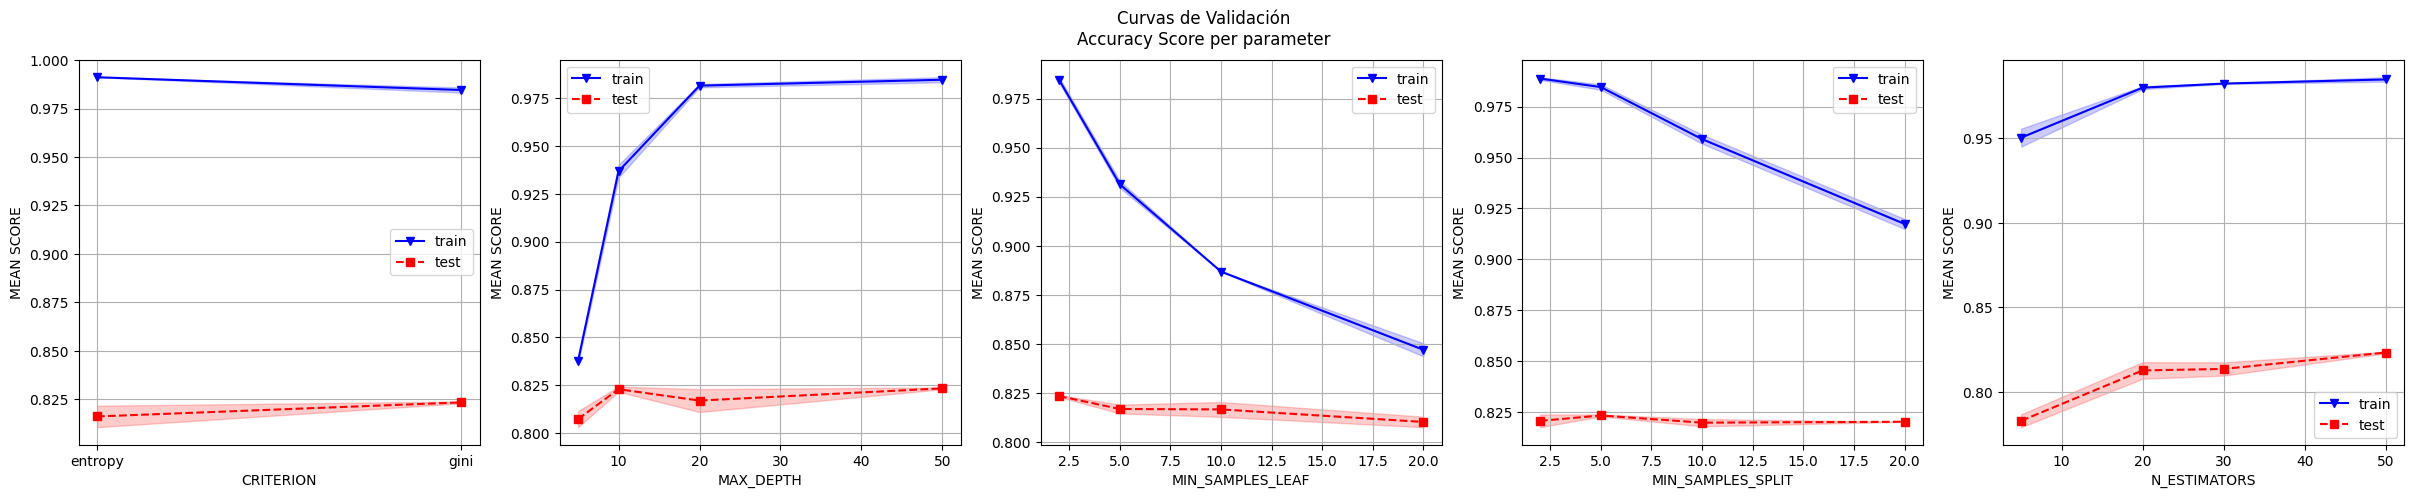

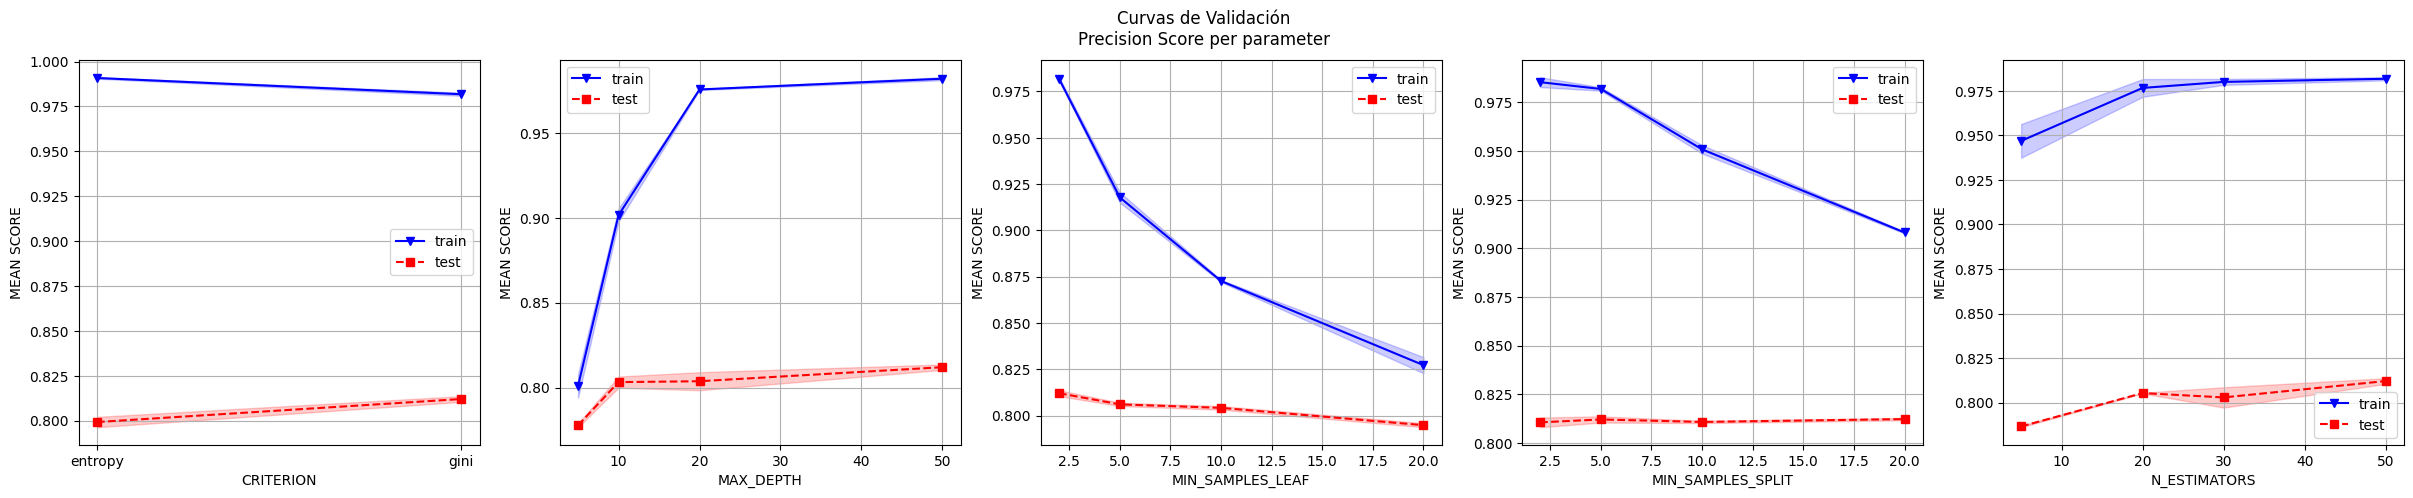

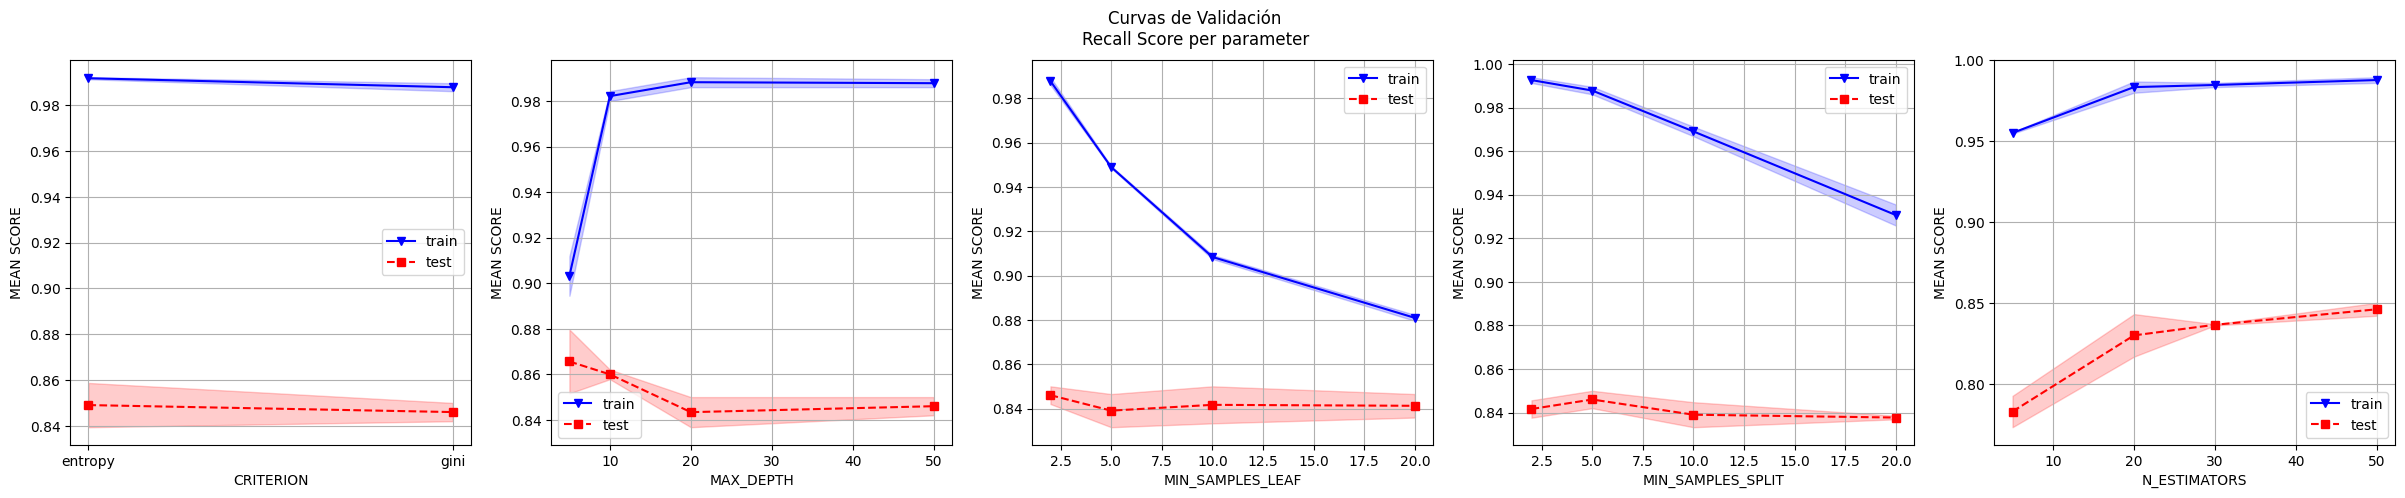

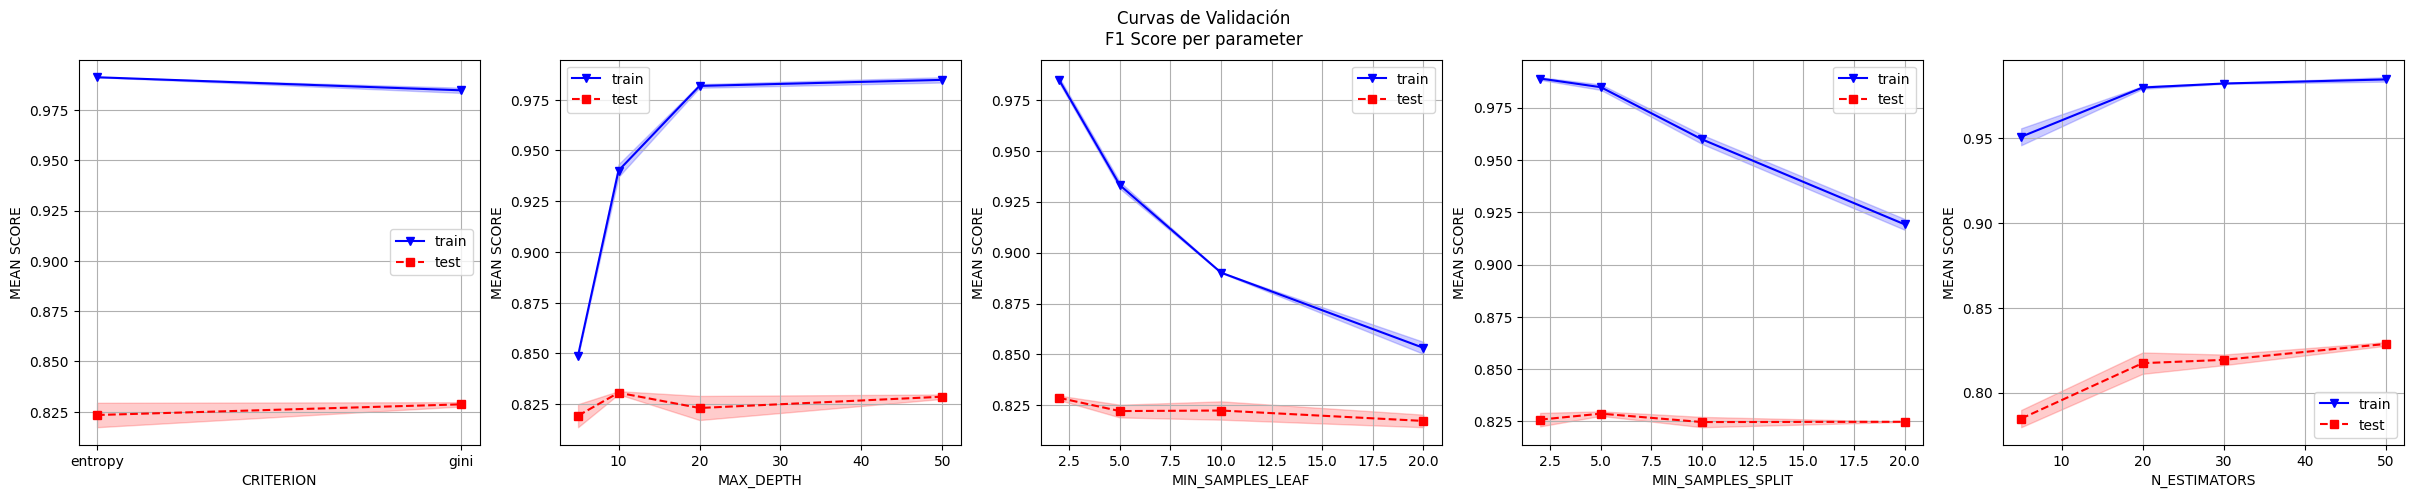

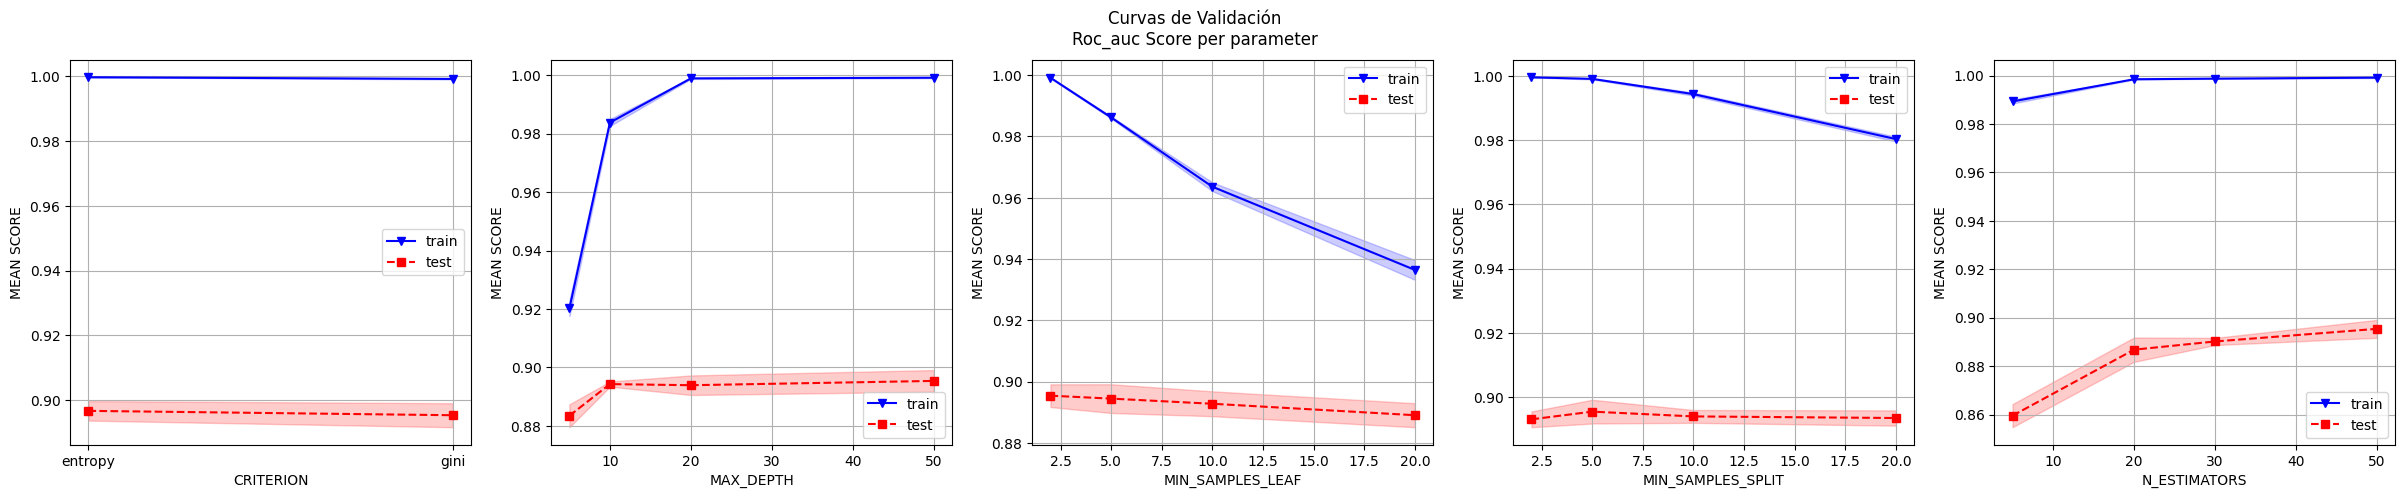

In [ ]:
plot_GridSearchCV(grid_search_rf)

## Buscando y analizando mejores hiperparámetros de **Redes Neuronales**








In [ ]:
start_time = time.time()
cv=5
grid_search_rn = param_redes_neuronales(cv, x, y)
end_time = time.time()
print('Tiempo de ejecución mejores Hiperparámetros Redes Neuronales: ', end_time - start_time, 'segundos')


<ipython-input-32-2027052ecd42>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=0)


Mejores hiperparámetros:  {'batch_size': 5, 'epochs': 10, 'hidden_units': [20, 10], 'optimizer': 'adam'}
Número de combinaciones hechas:  72
Mejor Accuracy:  0.8198621965909951
Mejor Precision:  0.8148084972482238
Mejor Recall:  0.8653766258668627
Mejor F1:  0.8265434583401132
Mejor AUC:  0.89533256305833
Tiempo de ejecución mejores Hiperparámetros Redes Neuronales:  2381.241637945175 segundos


### Graficando los resultados de **Redes Neuronales** para cada hiperparámetro en cada métrica

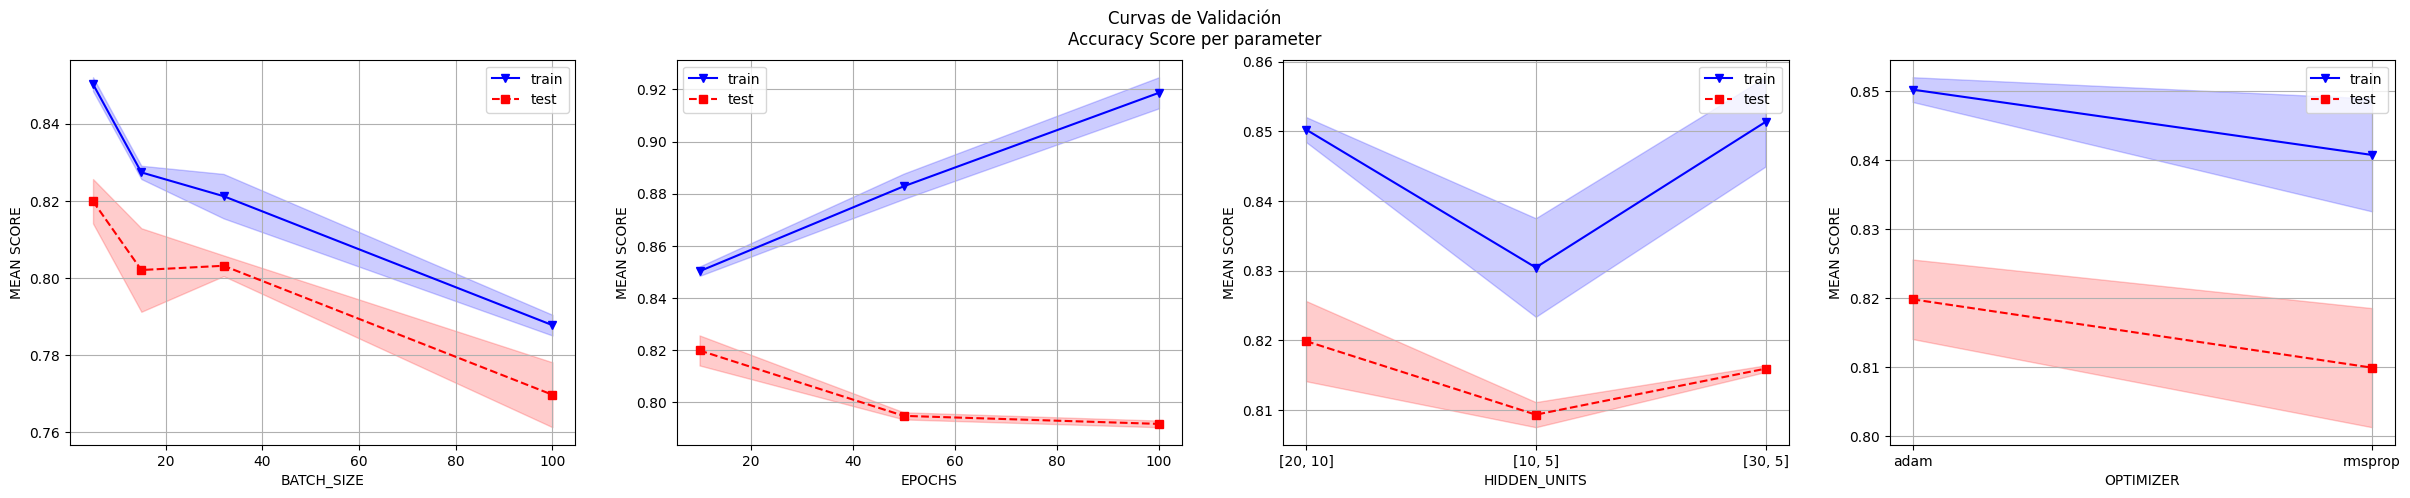

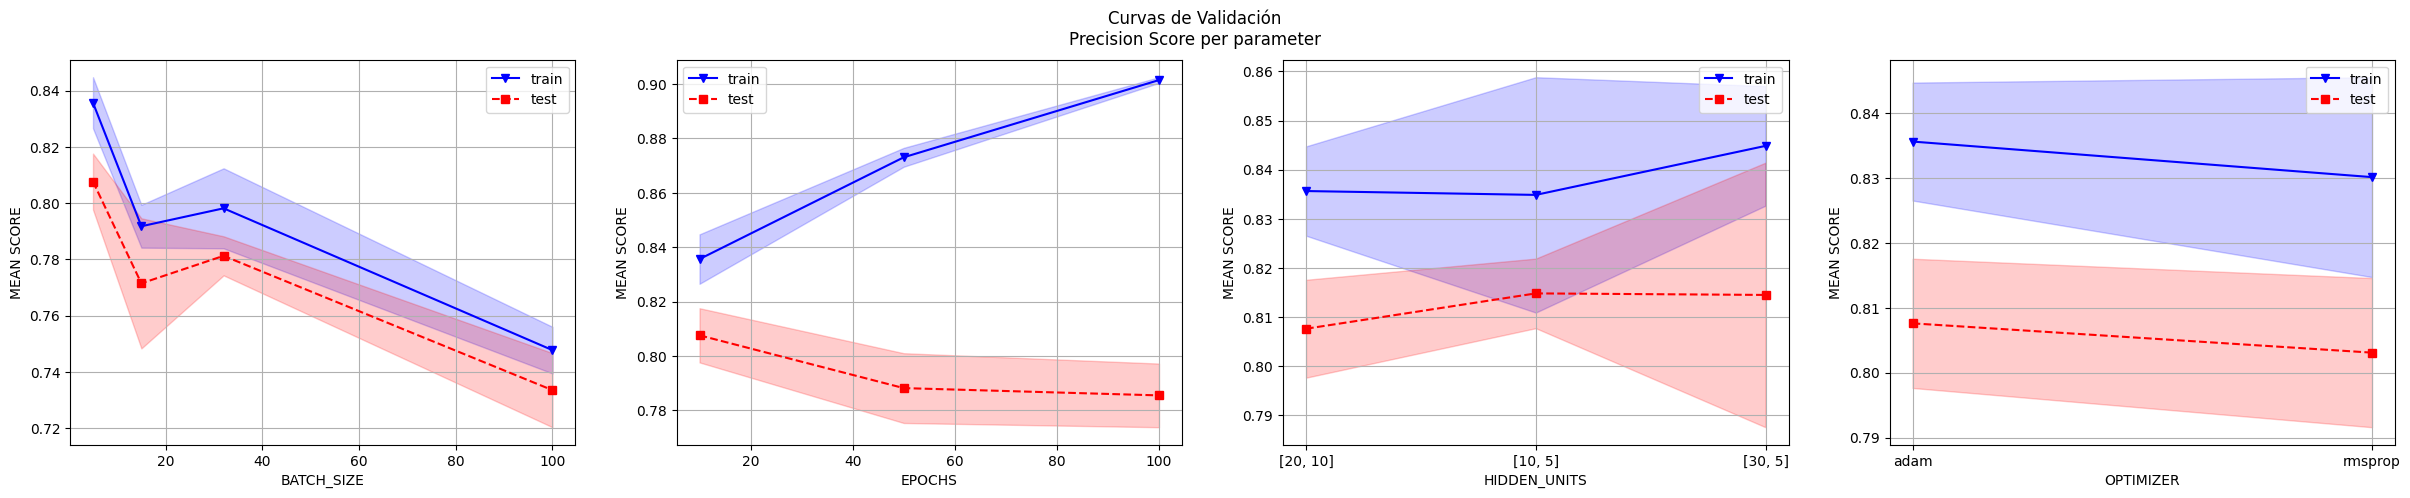

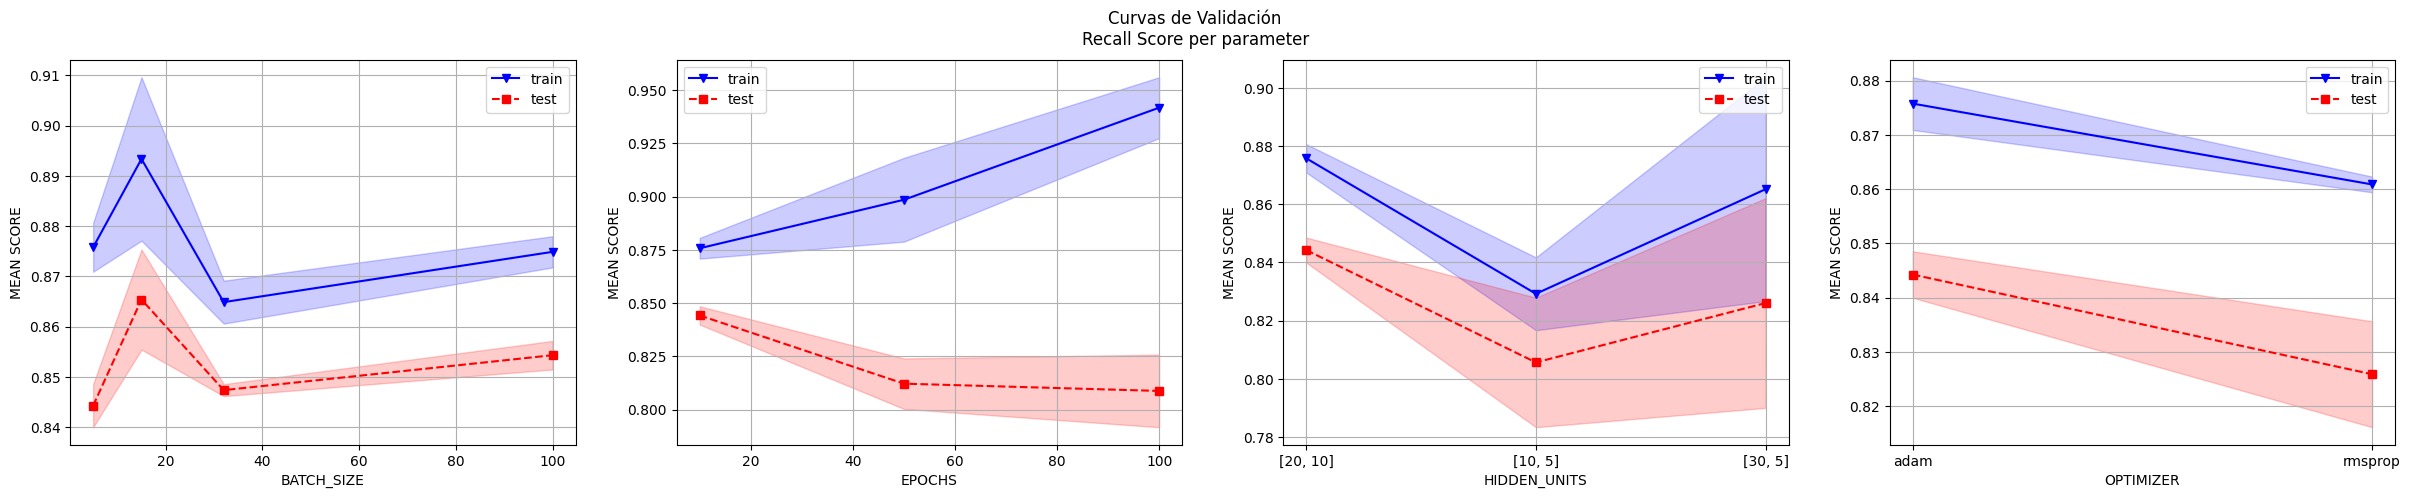

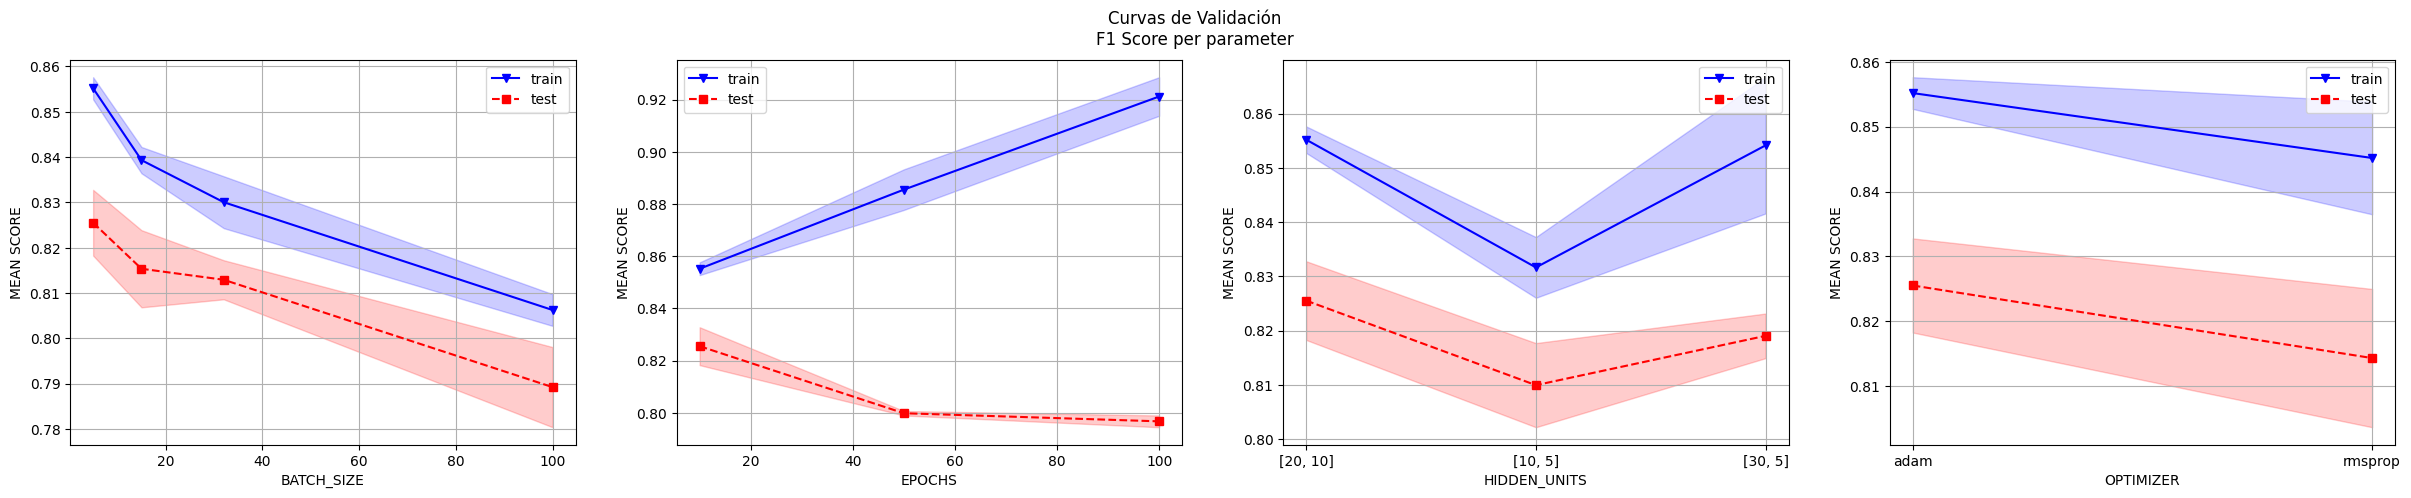

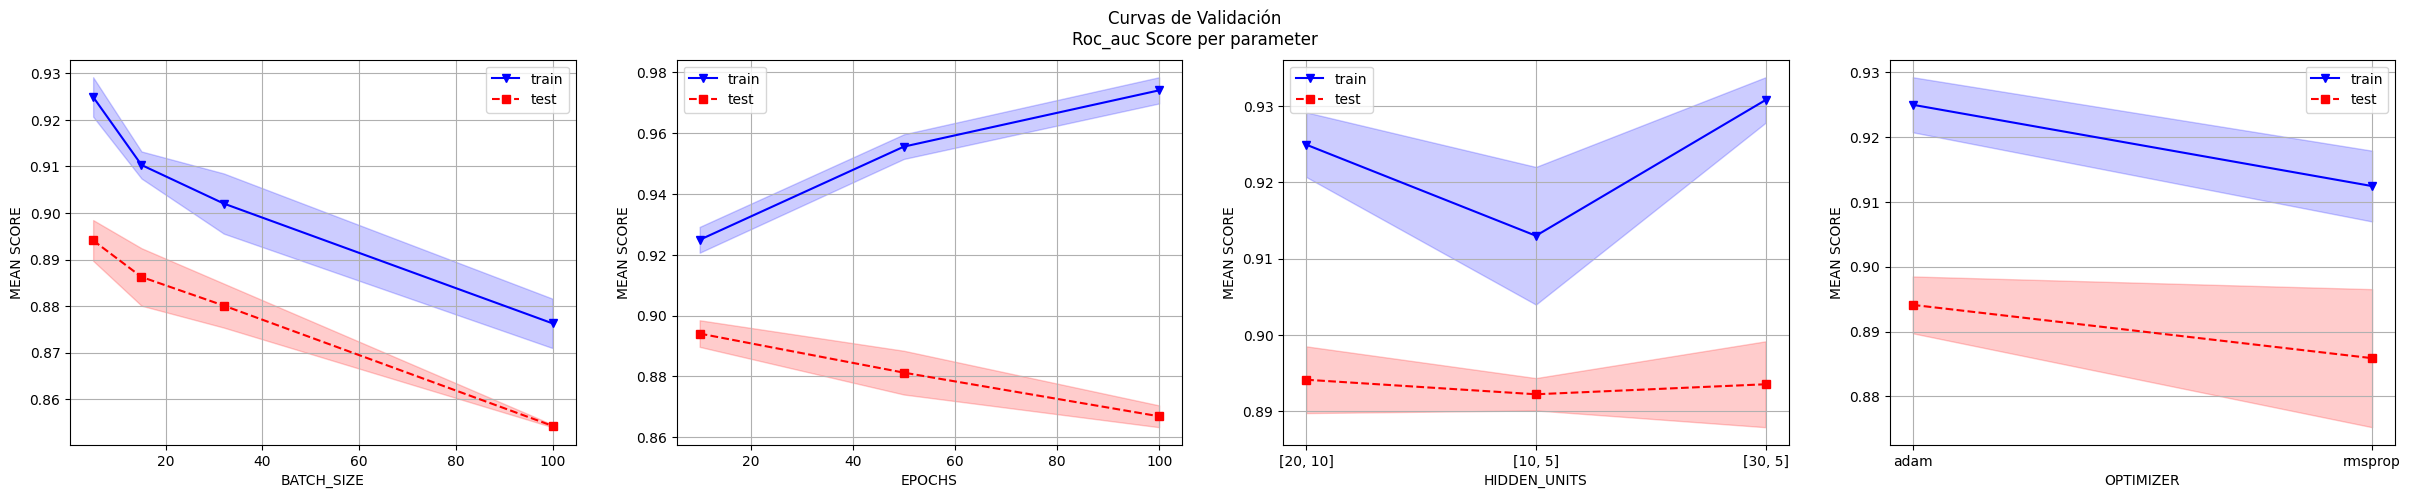

In [ ]:
plot_GridSearchCV(grid_search_rn)







---


# **Algoritmos no supervisados**

## **K-Means**

In [ ]:
def kmeans(X, n_clusters):
    
    # Crear instancia del modelo K-means
    kmeans = KMeans(n_clusters=n_clusters)

    # Entrenar el modelo y predecir los clusters
    y_pred = kmeans.fit_predict(X)

    # Obtener los centroides de los clusters
    centroids = kmeans.cluster_centers_

    silhouette = silhouette_score(X, y_pred)
    db_score = davies_bouldin_score(X, y_pred)
    ch_score = calinski_harabasz_score(X, y_pred)

    # Graficar los clusters en un espacio 2D para cada par de características
    n_features = X.shape[1]
    fig, axes = plt.subplots(n_features, n_features, figsize=(100,100))
    for i in range(n_features):
        for j in range(n_features):
            axes[i][j].scatter(X[:, i], X[:, j], c=y_pred)
            axes[i][j].set_xlabel('Feature {}'.format(i+1))
            axes[i][j].set_ylabel('Feature {}'.format(j+1))
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])

    plt.show()

    print("Numero de clusters a utilizar", n_clusters)
    print('Silhouette score:', silhouette)
    print('Davies-Bouldin score:', db_score)
    print('Calinski-Harabasz score:', ch_score)


In [ ]:
#Llamado al Kmeans
start_time = time.time()
kmeans(x, 2)
end_time = time.time()
print('Tiempo de ejecución utilizando K-Means: ', end_time - start_time, 'segundos')

Output hidden; open in https://colab.research.google.com to view.

## **PCA + K-means**

Debido al alto numero de características presentes en el dataset, podríamos aplicar PCA para reducir la dimensionalidad a **2 componentes** e intentar visualizar en 2 dimensiones el agrupamiento de los datos al usar K-Means. Sin embargo, tener presente que el PCA transforma las caracteríaticas en valores no interpretables y que además reducir la dimensión puede generar pérdida de información relevante para el dataset.  
Por lo tanto, existen técnicas que intentan deterninar el numero óptimo de componentes PCA.

In [ ]:
def pca_kmeans(X, n_components):
    
    # Aplicar PCA para reducir la dimensionalidad de los datos a 2 dimensiones
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Crear instancia del modelo K-means
    kmeans = KMeans(n_clusters=n_components)
    
    # Entrenar el modelo y predecir los clusters
    y_pred = kmeans.fit_predict(X_pca)

    # Calcular las medidas de desempeño
    silhouette = silhouette_score(X_pca, y_pred)
    db_score = davies_bouldin_score(X_pca, y_pred)
    ch_score = calinski_harabasz_score(X_pca, y_pred)

   # Graficar los clusters en 2 dimensiones 
    centroids = kmeans.cluster_centers_
    fig, ax = plt.subplots()

    # Graficar los puntos de cada cluster 
    for i in range(n_components):
        ax.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], label='Cluster {}'.format(i))
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, linewidths=1, color='r', label='Centroides')
    ax.set_title('K-means clustering (k={})'.format(n_components))
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(color='w')
    ax.set_facecolor('lightgray')
    plt.show()

    # Crear un gráfico de barras
    ax = sns.countplot(x=y_pred, linewidth=1, edgecolor='black')
    ax.set_title('Labels')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Frecuencia')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    plt.show()

    print("Numero de componentes usadas", n_components)
    print("Numero de clusters usados", n_components)
    print('Silhouette score:', silhouette)
    print('Davies-Bouldin score:', db_score)
    print('Calinski-Harabasz score:', ch_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


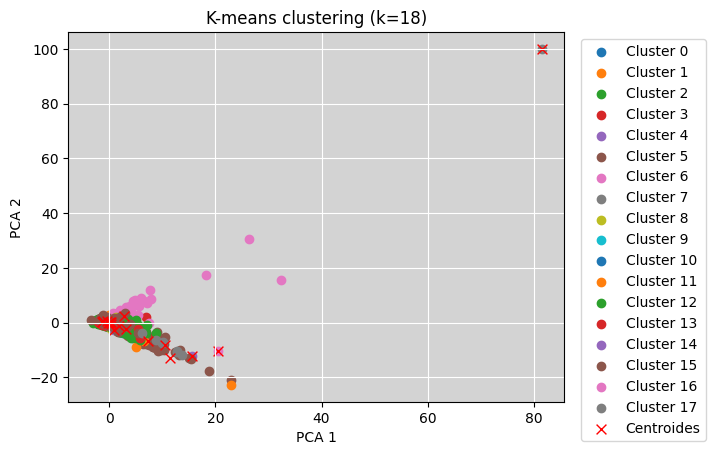

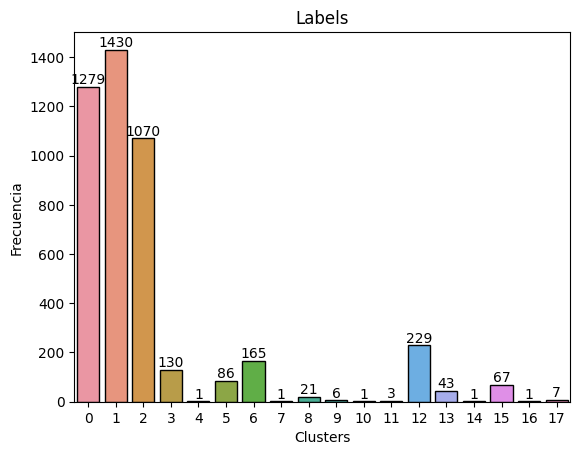

Numero de componentes usadas 18
Numero de clusters usados 18
Silhouette score: 0.18994258394795233
Davies-Bouldin score: 0.8511724400553893
Calinski-Harabasz score: 612.4178606513116
Tiempo de ejecución utilizando PCA + K-means:  2.9319920539855957 segundos


In [ ]:
#Llamado al pca_kmeans
start_time = time.time()
n_components=18
pca_kmeans(x, n_components)
end_time = time.time()
print('Tiempo de ejecución utilizando PCA + K-means: ', end_time - start_time, 'segundos')

## **t-SNE (t-Distributed Stochastic Neighbor Embedding) + Kmeans**

In [ ]:
def tSNE_kmeans(X, n_components):
  
  # Aplicar t-SNE para reducir la dimensionalidad de los datos a 2 dimensiones
  X_tsne  = TSNE(n_components=n_components, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)

  # Crear instancia del modelo K-means
  kmeans = KMeans(n_clusters=n_components)

  # Entrenar el modelo y predecir los clusters
  y_pred = kmeans.fit_predict(X_tsne)
  
  # Calcular las medidas de desempeño
  silhouette = silhouette_score(X_tsne, y_pred)
  db_score = davies_bouldin_score(X_tsne, y_pred)
  ch_score = calinski_harabasz_score(X_tsne, y_pred)

  # Graficar los clusters en 2 dimensiones 
  centroids = kmeans.cluster_centers_
  fig, ax = plt.subplots()
  for i in range(n_components):
      ax.scatter(X_tsne[y_pred == i, 0], X_tsne[y_pred == i, 1], label='Cluster {}'.format(i))
  ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, linewidths=1, color='r', label='Centroides')
  ax.set_title('K-means clustering (k={})'.format(n_components))
  ax.set_xlabel('t-SNE1')
  ax.set_ylabel('t-SNE2')
  plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
  ax.grid(color='w')
  ax.set_facecolor('lightgray')
  plt.show()

  # Crear un gráfico de barras
  ax = sns.countplot(x=y_pred, linewidth=1, edgecolor='black')
  ax.set_title('Labels')
  ax.set_xlabel('Clusters')
  ax.set_ylabel('Frecuencia')
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
  plt.show()
  
  print("Numero de componentes usadas", n_components)
  print("Numero de clusters usados", n_components)
  print('Silhouette score:', silhouette)
  print('Davies-Bouldin score:', db_score)
  print('Calinski-Harabasz score:', ch_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


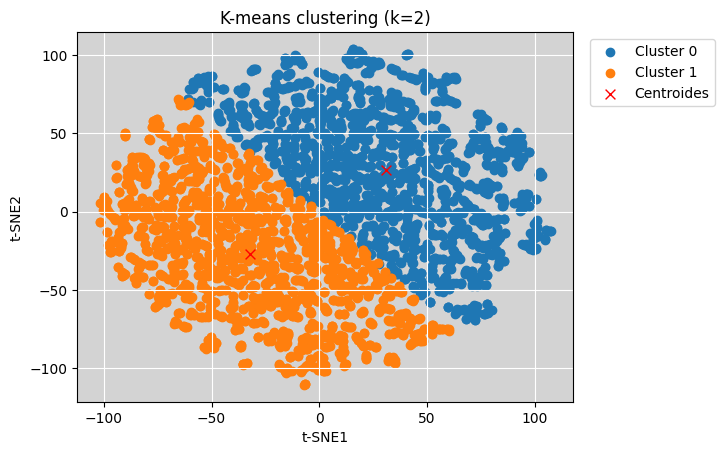

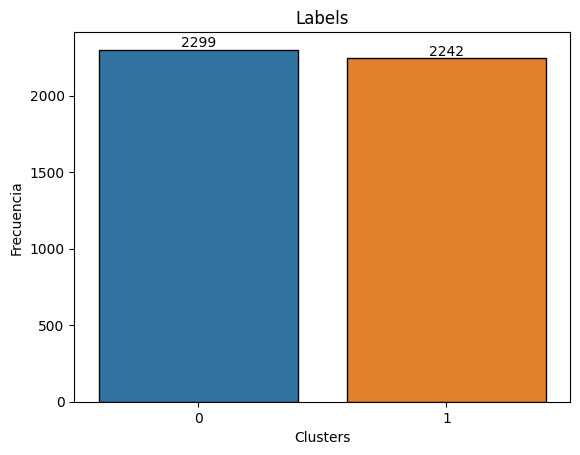

Numero de componentes usadas 2
Numero de clusters usados 2
Silhouette score: 0.345113
Davies-Bouldin score: 1.189857641756371
Calinski-Harabasz score: 2658.7839301874606
Tiempo de ejecución con tNSE:  50.17647695541382 segundos


In [ ]:
#Llamado al tSNE_kmeans
start_time = time.time()
n_components=1
tSNE_kmeans(x, n_components)
end_time = time.time()
print('Tiempo de ejecución con tSNE + Kmens: ', end_time - start_time, 'segundos')

---

# **Combinación de Algoritomos NO Supervisados + Supervisados**

## Definiendo el número óptimo de componentes

En **PCA**, el número óptimo de componentes se determina considerando la varianza explicada acumulada. La varianza explicada acumulada muestra la cantidad total de varianza en los datos que se puede explicar utilizando un número creciente de componentes principales. La elección del número óptimo de componentes depende de la cantidad de varianza que se desea retener en los datos.  

Por el contrario, no existe una rúbrica específica o una regla general para determinar el número óptimo de componentes para **t-SNE** (t-Distributed Stochastic Neighbor Embedding). t-SNE al ser un algoritmo no lineal de reducción de dimensionalidad no tiene una medida directa de varianza explicada.

In [ ]:
#Sabiendo el número de componentes para aplicar PCA

def pca_n_components():
  standardizedData = StandardScaler().fit_transform(x)

  # Determine covariance matrix
  cov_matrix = np.cov(standardizedData, rowvar=False)

  # Determine eigenvalues and eigenvectors
  egnvalues, egnvectors = eigh(cov_matrix)

  # Determine explained variance
  total_egnvalues = sum(egnvalues)
  var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

  # Plot the explained variance against cumulative explained variance
  cummulative_sum_exp = np.cumsum(var_exp)
  plt.bar(range(0,len(var_exp)), var_exp, alpha=0.2, align='center', label='Varianza explicada individual', color='green')
  plt.step(range(0,len(cummulative_sum_exp)), cummulative_sum_exp, where='mid',label='Varianza explicada acumulada')
  plt.title('Determinación del número óptimo de componentes en PCA')
  plt.ylabel('Proporción de varianza explicada acumulada')
  plt.xlabel('Número de componentes')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.grid()
  plt.show()
  
  percent=.80
  pca = PCA(percent)
  principalComponents = pca.fit_transform(X = standardizedData)

  # To get how many principal components was chosen
  print("El numero de componentes que garantiza una variaza explicada acumulada del ", percent*100, "%, son los primeros: ", pca.n_components_)
  return pca.n_components_


## **PCA + Random Forest + CV**

In [ ]:
start_time = time.time()

# Aplicar PCA para reducir la dimensionalidad de los datos
n_components=pca_n_components()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x)

cv=10
random_Forest=1
Cross_Validation(X_pca, y, cv, random_Forest)

end_time = time.time()
print('Tiempo de ejecución con PCA + Random Forest + CV: ', end_time - start_time, 'segundos')

Output hidden; open in https://colab.research.google.com to view.

## **PCA + Random Forest + TTS**

In [ ]:
start_time = time.time()

# Aplicar PCA para reducir la dimensionalidad de los datos 
n_components=pca_n_components()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x)

tts=10
random_Forest=1
Train_Test_Split(X_pca, y, tts, random_Forest)

end_time = time.time()
print('Tiempo de ejecución con PCA + Random Forest + TTS: ', end_time - start_time, 'segundos')

Output hidden; open in https://colab.research.google.com to view.

## **tSNE + Redes Neuronales + CV**

In [ ]:
start_time = time.time()

  # Aplicar t-SNE para reducir la dimensionalidad de los datos
n_components=2
X_tsne  = TSNE(n_components=n_components, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(x)

cv=10
redes_neuronales=2
Cross_Validation(X_tsne, y, cv, redes_neuronales)

end_time = time.time()
print('Tiempo de ejecución con PCA + Redes Neuronales + CV: ', end_time - start_time, 'segundos')

Output hidden; open in https://colab.research.google.com to view.

## **tSNE + Redes Neuronales + TTS**

In [ ]:
start_time = time.time()

# Aplicar t-SNE para reducir la dimensionalidad de los datos 
n_components=2
X_tsne  = TSNE(n_components=n_components, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(x)

tts=10
redes_neuronales=2
Train_Test_Split(X_tsne, y, tts, redes_neuronales)

end_time = time.time()
print('Tiempo de ejecución con PCA + Redes Neuronales + TTS: ', end_time - start_time, 'segundos')

Output hidden; open in https://colab.research.google.com to view.

---

# Buscando y analizando mejores hiperparámetros para **Algoritmos No Supervisados + Supervisados**

**Precaución:** Tiempo de ejecucion intensivo    

## Buscando y analizando mejores hiperparámetros de **PCA** + **Random Forest**

In [ ]:
start_time = time.time()
cv=5
grid_search_pca_rf = param_random_forest(cv, X_pca, y)
end_time = time.time()
print('Tiempo de ejecución mejores Hiperparámetros Random Forest: ', end_time - start_time, 'segundos')

Mejores hiperparámetros:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Número de combinaciones hechas:  512
Mejor Accuracy:  0.7786819833293568
Mejor Precision:  0.7690882758365086
Mejor Recall:  0.8456227719021165
Mejor F1:  0.7893360230571007
Mejor AUC:  0.853237099619085
Tiempo de ejecución mejores Hiperparámetros Random Forest:  286.74837017059326 segundos


### Graficando resultados

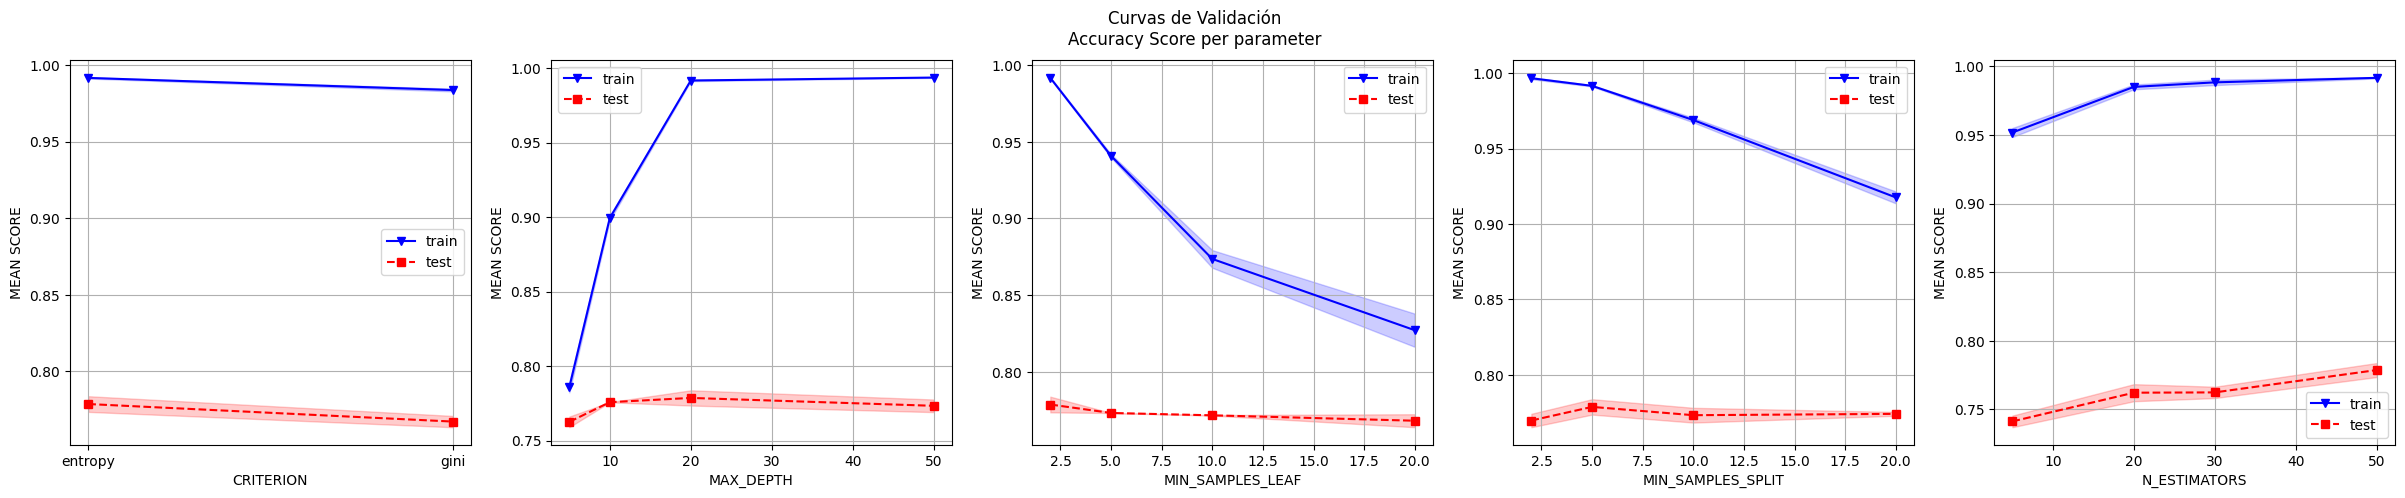

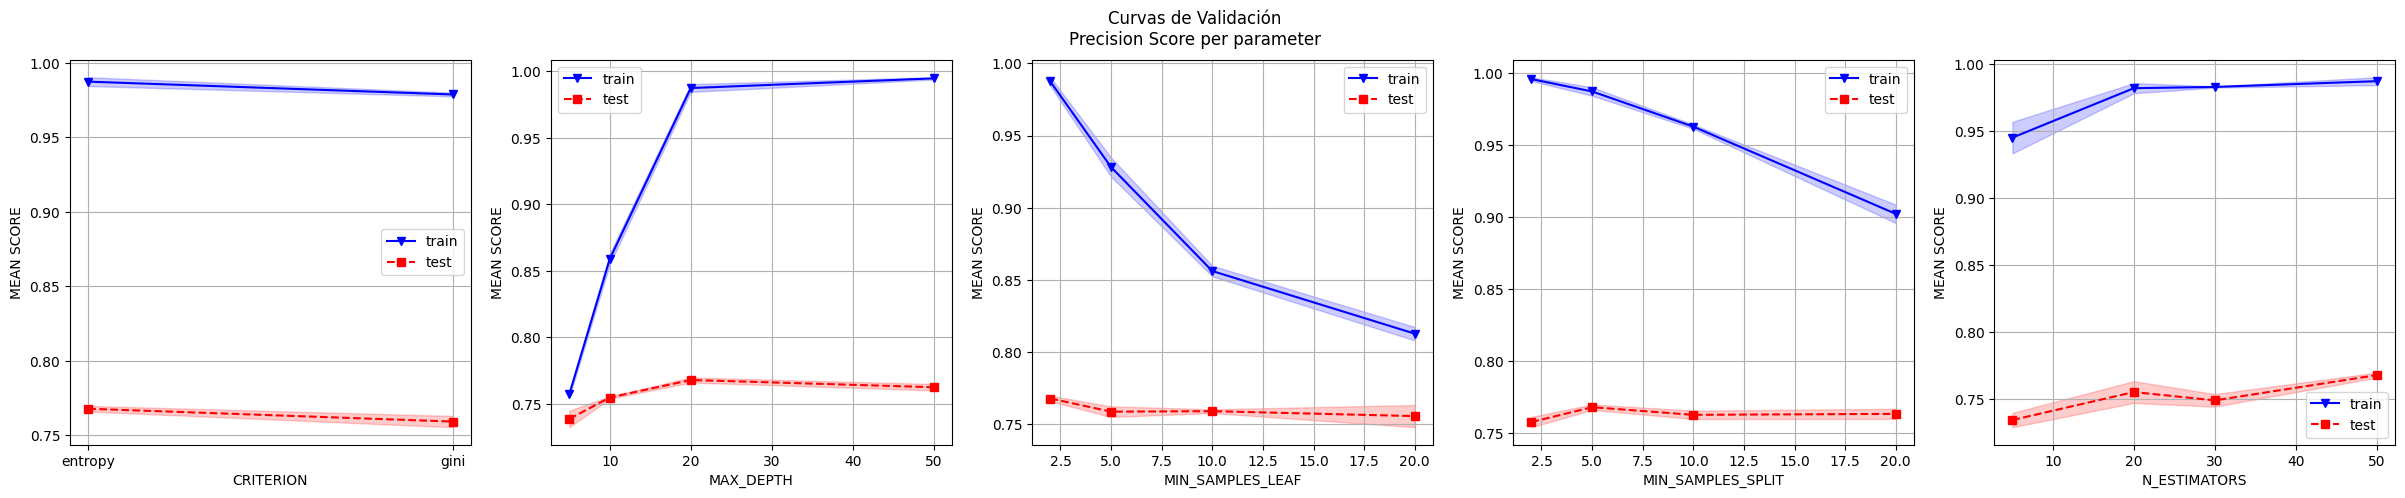

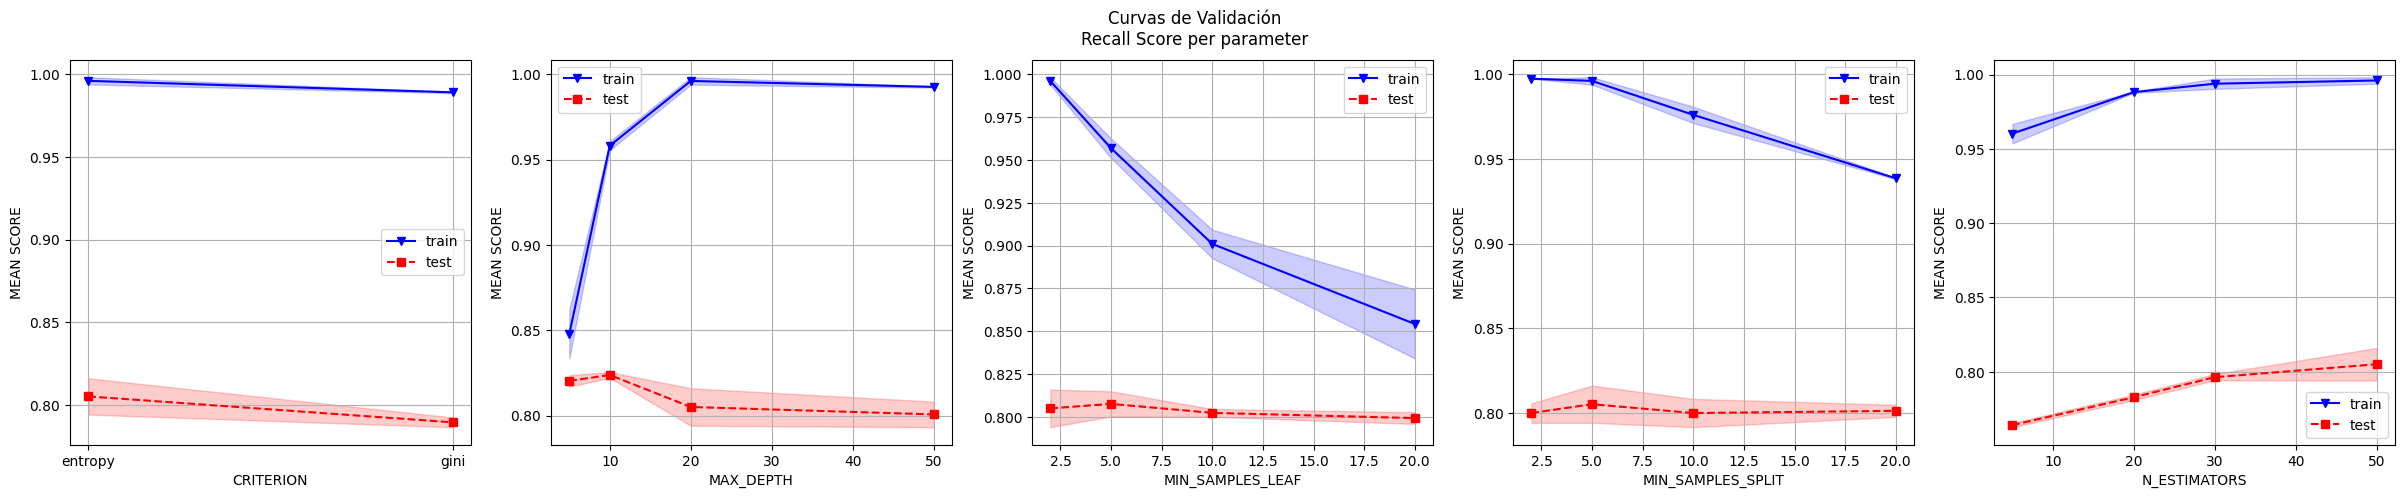

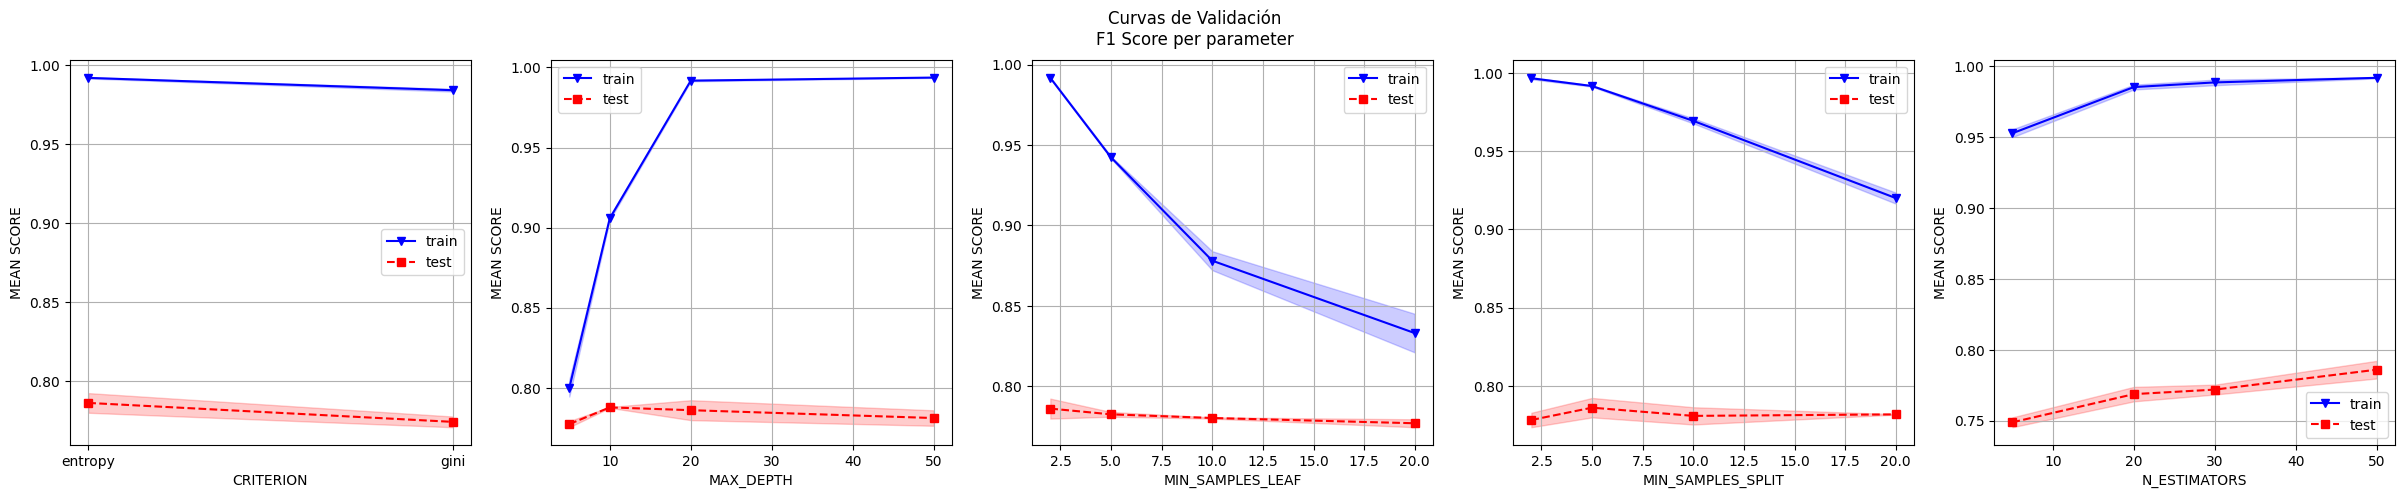

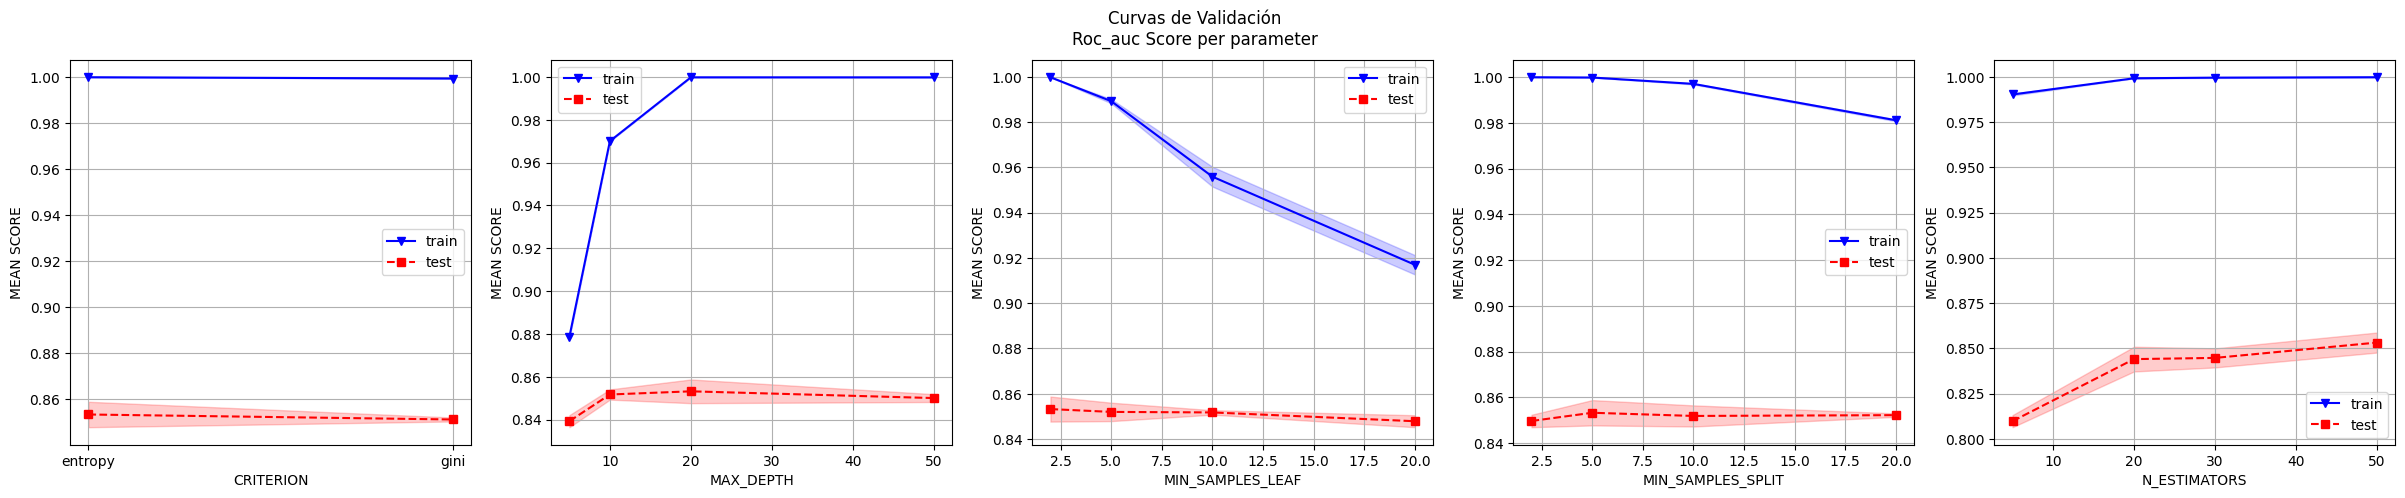

In [ ]:
plot_GridSearchCV(grid_search_pca_rf)

## Buscando y analizando mejores hiperparámetros de **tSNE** + **Redes Neuronales**

In [ ]:
start_time = time.time()
cv=5
grid_search_tsne_rn = param_redes_neuronales(cv, X_tsne, y)
end_time = time.time()
print('Tiempo de ejecución mejores Hiperparámetros Redes Neuronales: ', end_time - start_time, 'segundos')


Mejores hiperparámetros:  {'batch_size': 5, 'epochs': 100, 'hidden_units': [20, 10], 'optimizer': 'adam'}
Número de combinaciones hechas:  72
Mejor Accuracy:  0.6727623919288792
Mejor Precision:  0.6828468975487063
Mejor Recall:  0.8653184165232358
Mejor F1:  0.7002975063558177
Mejor AUC:  0.7238553959068363
Tiempo de ejecución mejores Hiperparámetros Redes Neuronales:  2356.6410348415375 segundos


### Graficando resultados

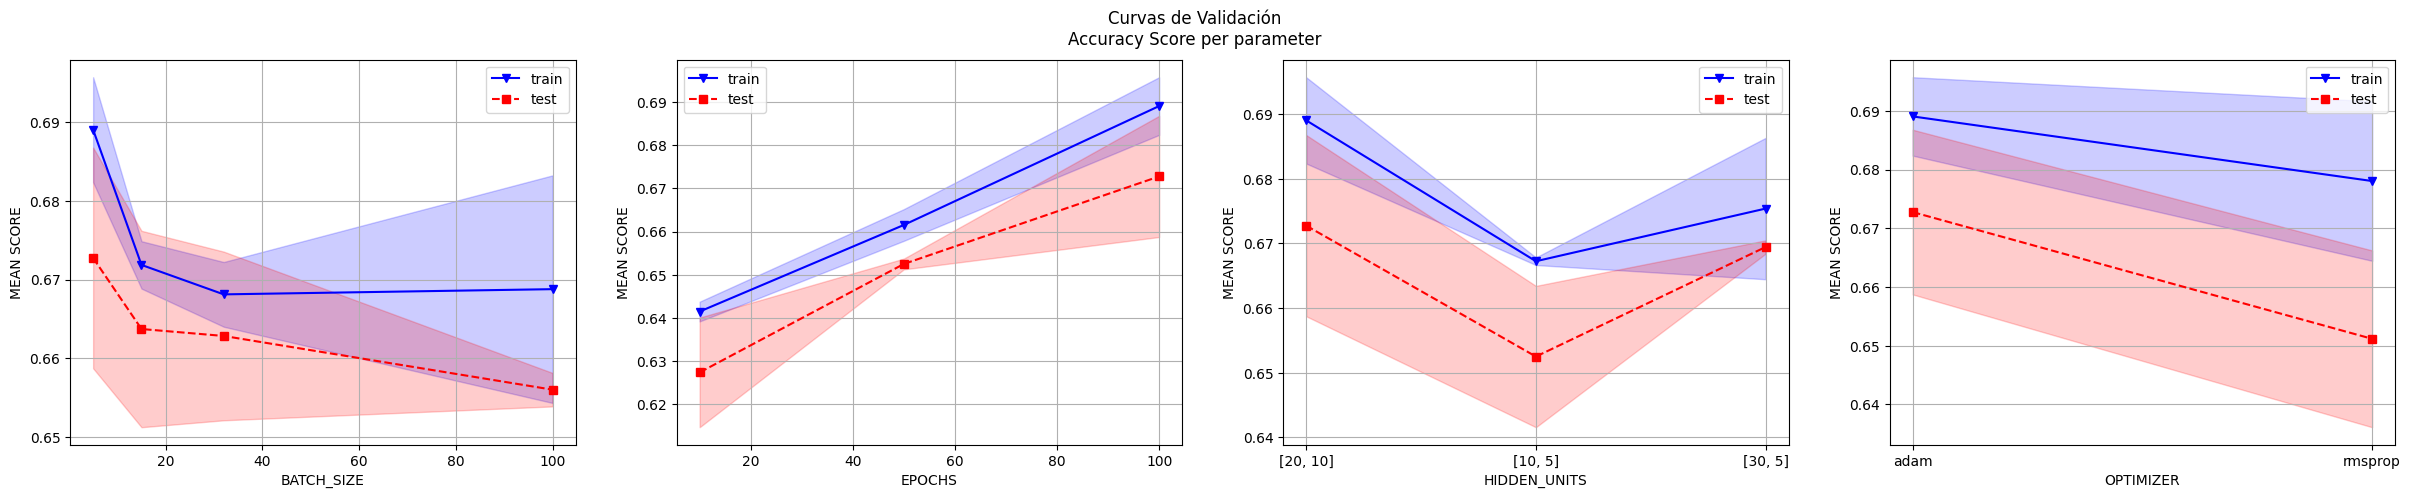

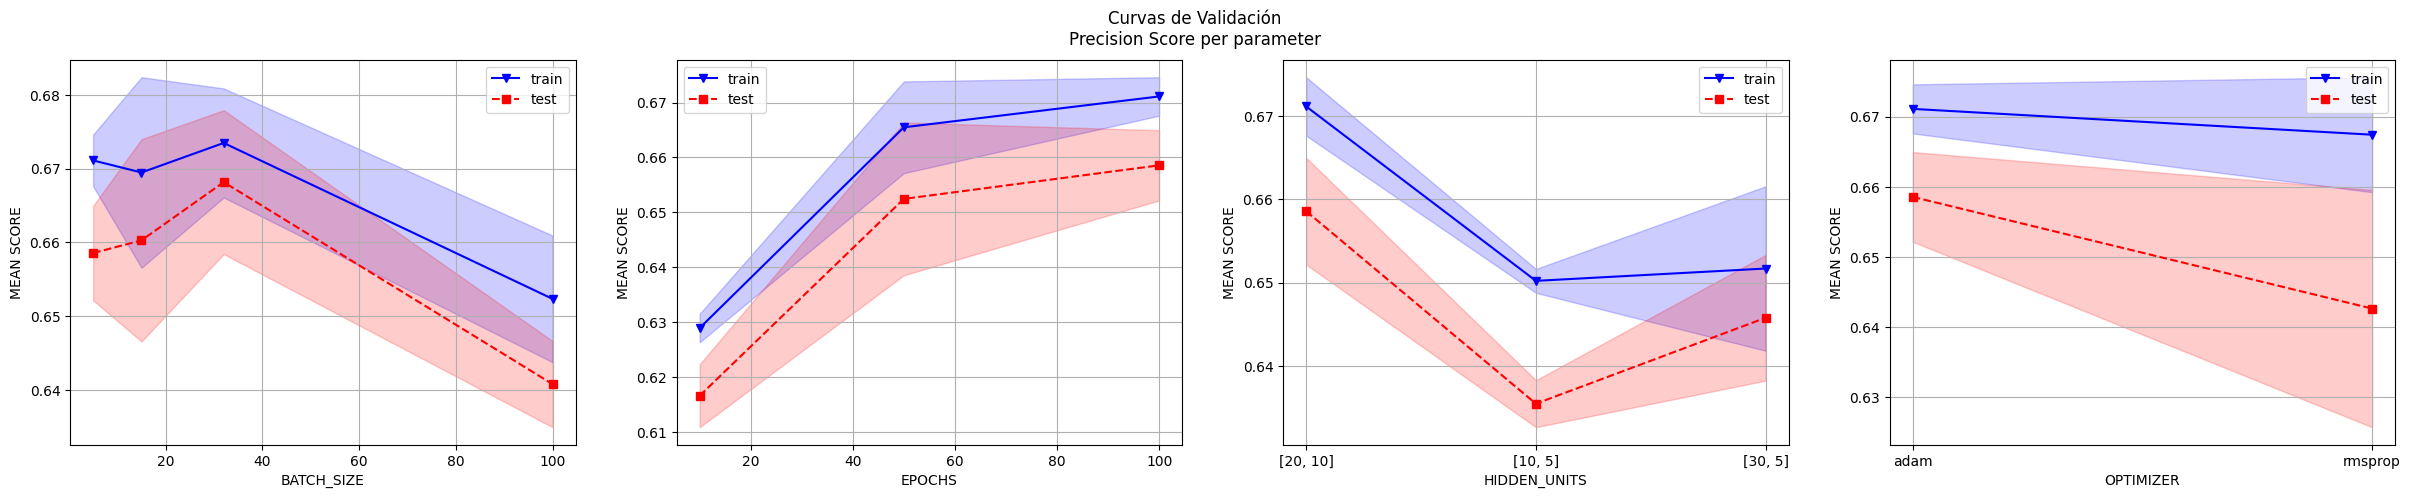

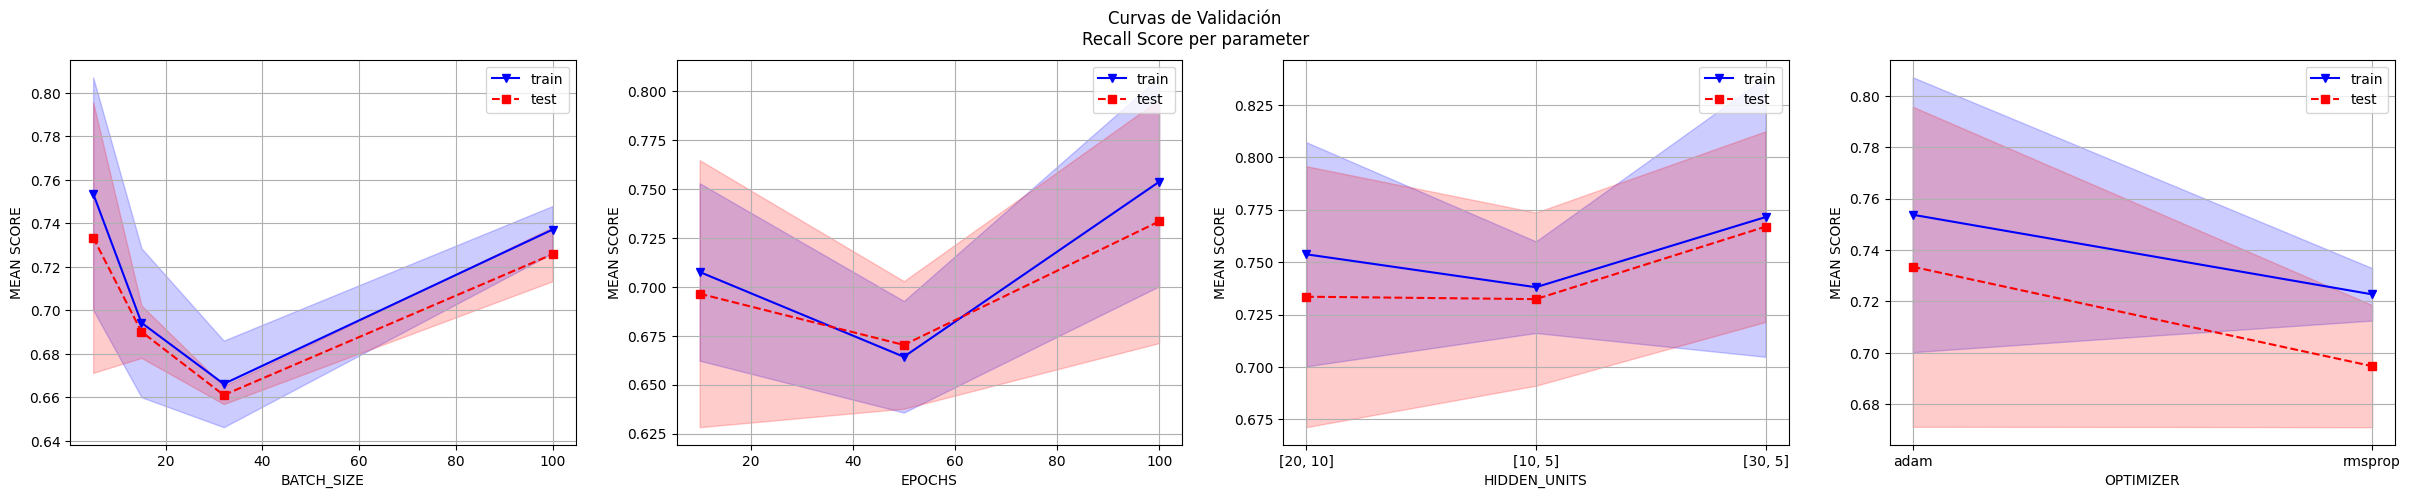

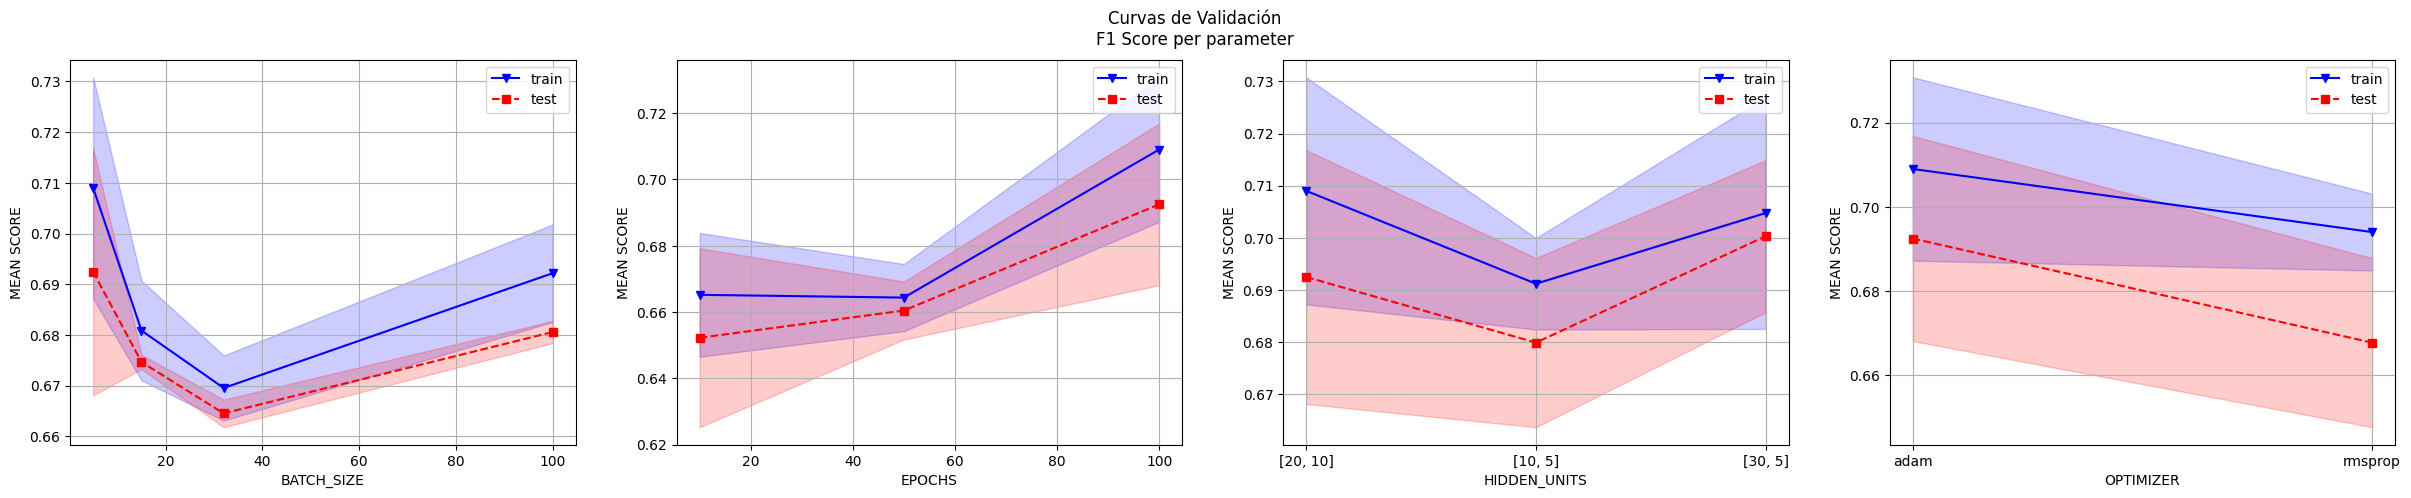

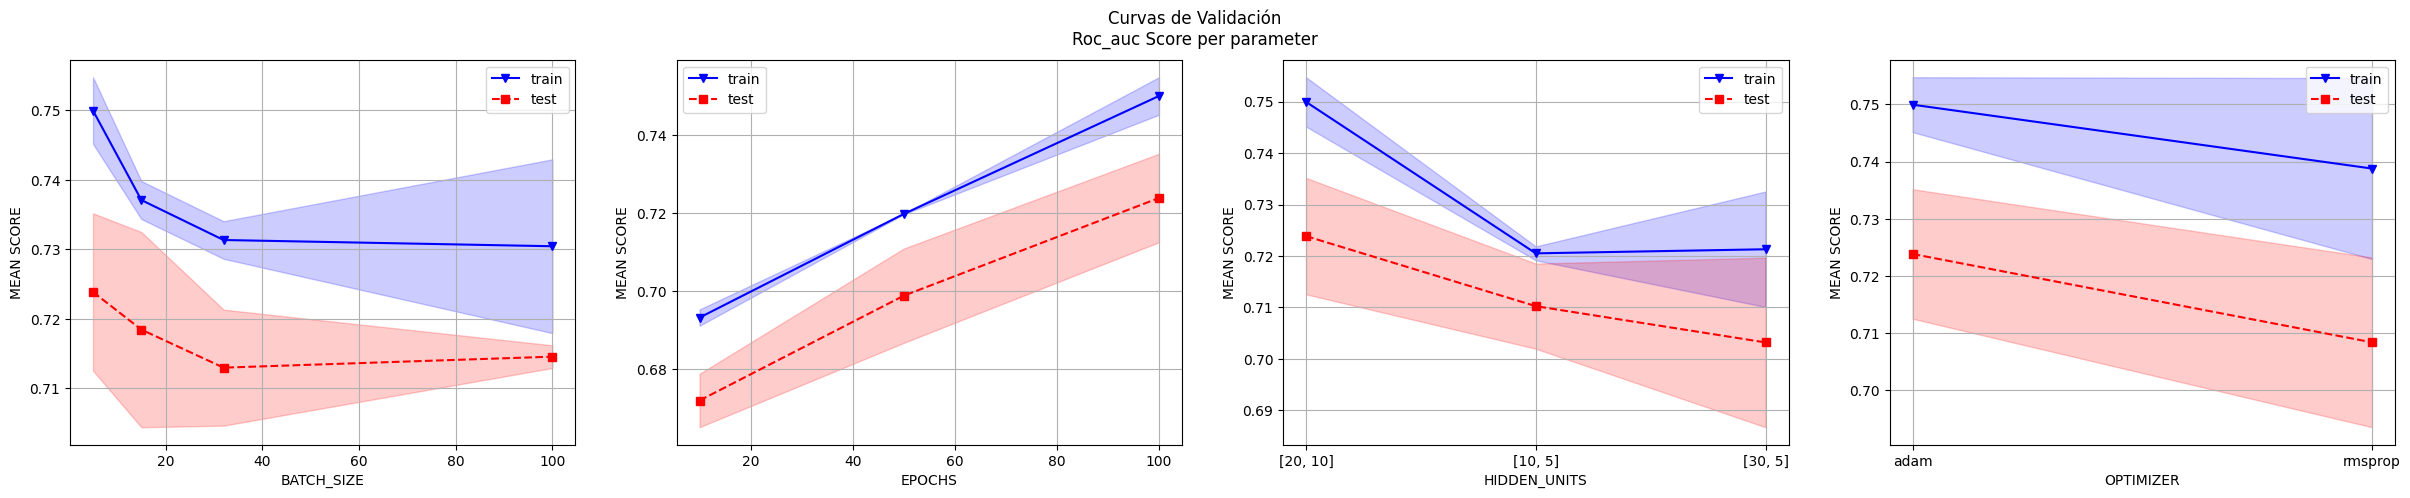

In [ ]:
plot_GridSearchCV(grid_search_tsne_rn)